In [1]:
from expetator.tools import read_experiment, show_heatmap, add_objectives
from expetator.tools import prune_vectors, mojitos_to_vectors, show_pct_distribution
from expetator.monitors import mojitos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### 1. Read dataset
#### 1.1 knowledge
- **duration = endTime - startTime**: but knowledge.duration < duration
- **nproc**: number of processing units
- **energy**: duration * power
- **etp**: duration*energy
- **expe**: the index of experiment

#### 1.2 mojitos
```
network_names = {'rxb', 'rxp', 'txb', 'txp'}
infiniband_names = {'irxb', 'irxp', 'itxb', 'itxp'}
rapl_names = {'dram0', 'dram1', 'package-00', 'package-11'}
load_names = {'user', 'nice', 'system', 'idle', 'iowait', 'irq',
              'softirq', 'steal', 'guest', 'guest_nice'}
perf_names = {'cpu_cycles', 'instructions', 'cache_references', 'cache_misses',
              'branch_instructions', 'branch_misses', 'bus_cycles', 'ref_cpu_cycles',
              'cache_l1d', 'cache_ll', 'cache_dtlb', 'cache_itlb', 'cache_bpu',
              'cache_node', 'cache_op_read', 'cache_op_prefetch', 'cache_result_access',
              'cpu_clock', 'task_clock', 'page_faults', 'context_switches',
              'cpu_migrations', 'page_faults_min', 'page_faults_maj',
              'alignment_faults', 'emulation_faults', 'dummy', 'bpf_output'}
```

In [2]:
knowledge = pd.read_csv("knowledge_allmetrics.csv")
vectors = pd.read_csv("vectors_allmetrics.csv")

In [3]:
vectors['metric'] = knowledge.metric

In [7]:
knowledge

,hostname,fullname,nproc,duration,startTime,endTime,fmin,fmax,hostlist,basename,expe,power,energy,etp,metric,target,targetZ
0,grisou-30.nancy.grid5000.fr,sp-C-64,64,48.920000,1603067848,1603067900,1200000,1200000,grisou-30.nancy.grid5000.fr;grisou-31.nancy.gr...,../../../dataset/nancy/grisou-2-11-20/0_allpct...,0,159.315789,7793.728421,381269.194358,energy,1200000,0
1,grisou-30.nancy.grid5000.fr,sp-C-64,64,47.630000,1603067930,1603067980,1200000,1300000,grisou-30.nancy.grid5000.fr;grisou-31.nancy.gr...,../../../dataset/nancy/grisou-2-11-20/0_allpct...,0,162.500000,7739.875000,368650.246250,energy,1300000,0
2,grisou-30.nancy.grid5000.fr,sp-C-64,64,45.820000,1603067992,1603068040,1200000,1400000,grisou-30.nancy.grid5000.fr;grisou-31.nancy.gr...,../../../dataset/nancy/grisou-2-11-20/0_allpct...,0,166.340909,7621.740455,349228.147627,energy,1400000,0
3,grisou-30.nancy.grid5000.fr,sp-C-64,64,44.890000,1603068053,1603068099,1200000,1500000,grisou-30.nancy.grid5000.fr;grisou-31.nancy.gr...,../../../dataset/nancy/grisou-2-11-20/0_allpct...,0,169.952381,7629.162381,342473.099281,energy,1500000,0
4,grisou-30.nancy.grid5000.fr,sp-C-64,64,43.800000,1603068112,1603068158,1200000,1600000,grisou-30.nancy.grid5000.fr;grisou-31.nancy.gr...,../../../dataset/nancy/grisou-2-11-20/0_allpct...,0,172.261905,7545.071429,330474.128571,energy,1600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47818,grisou-1.nancy.grid5000.fr,mpigeneric-0-0-16-0,64,58.353963,1589477505,1589477564,1200000,2000000,grisou-1.nancy.grid5000.fr;grisou-2.nancy.grid...,0_allpct_grisou-1.nancy.grid5000.fr_1589456512,1765,178.425532,10411.836888,607571.944502,etp,1600000,1600000
47819,grisou-1.nancy.grid5000.fr,mpigeneric-0-0-16-0,64,56.096418,1589477577,1589477634,1200000,2100000,grisou-1.nancy.grid5000.fr;grisou-2.nancy.grid...,0_allpct_grisou-1.nancy.grid5000.fr_1589456512,1765,183.543478,10296.131678,577576.106375,etp,1600000,1600000
47820,grisou-1.nancy.grid5000.fr,mpigeneric-0-0-16-0,64,56.196199,1589477647,1589477704,1200000,2200000,grisou-1.nancy.grid5000.fr;grisou-2.nancy.grid...,0_allpct_grisou-1.nancy.grid5000.fr_1589456512,1765,188.531915,10594.777007,595386.197058,etp,1600000,1600000
47821,grisou-1.nancy.grid5000.fr,mpigeneric-0-0-16-0,64,55.274901,1589477717,1589477774,1200000,2300000,grisou-1.nancy.grid5000.fr;grisou-2.nancy.grid...,0_allpct_grisou-1.nancy.grid5000.fr_1589456512,1765,194.458333,10748.665124,594131.400591,etp,1600000,1600000


In [15]:
nameofprograms = list(set(df_knowledge.fullname))

In [16]:
nameofprograms

['mem-12',
 'mem-24',
 'bt-B-16',
 'bt-B-48',
 'ep-D-64',
 'lu-C-64',
 'lu-B-16',
 'mem-16',
 'sleep-30',
 'mpigeneric-0-0-0-16',
 'lu-B-48',
 'mpigeneric-0-0-8-8',
 'bt-C-64',
 'mg-D-64',
 'mpigeneric-0-0-16-0',
 'sp-C-64',
 'mpigeneric-16-0-0-0',
 'mpigeneric-4-4-4-4',
 'is-D-64',
 'mpigeneric-0-16-0-0',
 'ft-C-64',
 'mem-32',
 'ep-C-48',
 'ft-C-48',
 'sp-B-48',
 'mg-D-48',
 'cg-D-64']

In [34]:
set(knowledge.metric)

{'duration', 'energy', 'etp'}

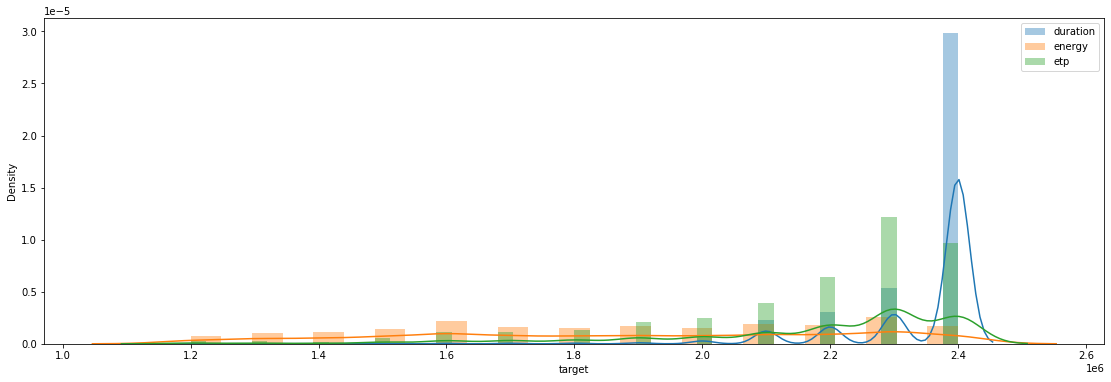

In [42]:
fig, ax = plt.subplots(figsize=[19, 6])
sns.distplot(knowledge[knowledge.metric == 'duration'].target, label="duration");
sns.distplot(knowledge[knowledge.metric == 'energy'].target, label="energy");
sns.distplot(knowledge[knowledge.metric == 'etp'].target, label="etp");
plt.legend()
plt.show()

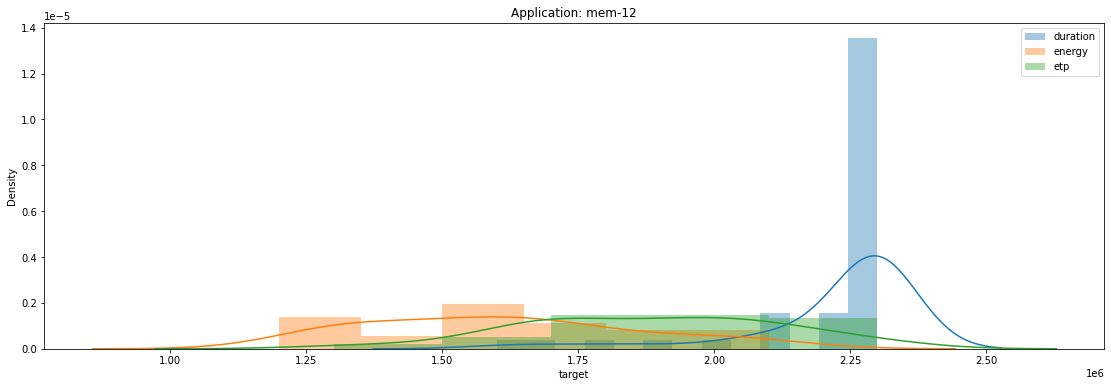

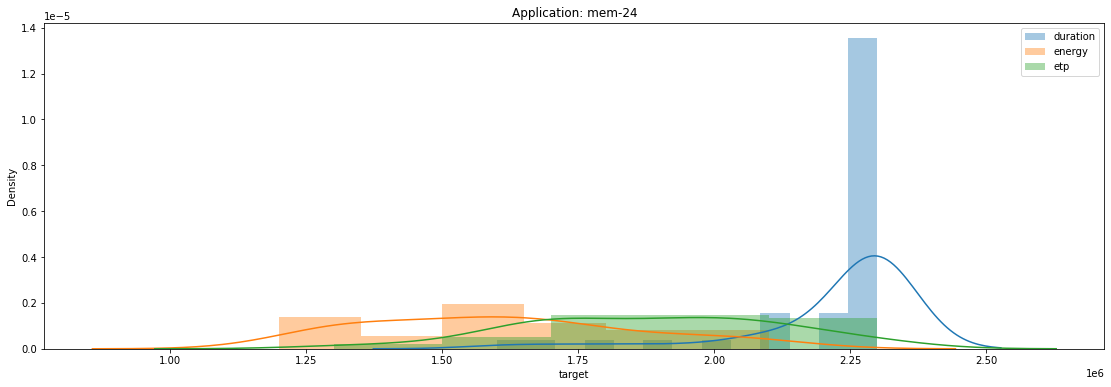

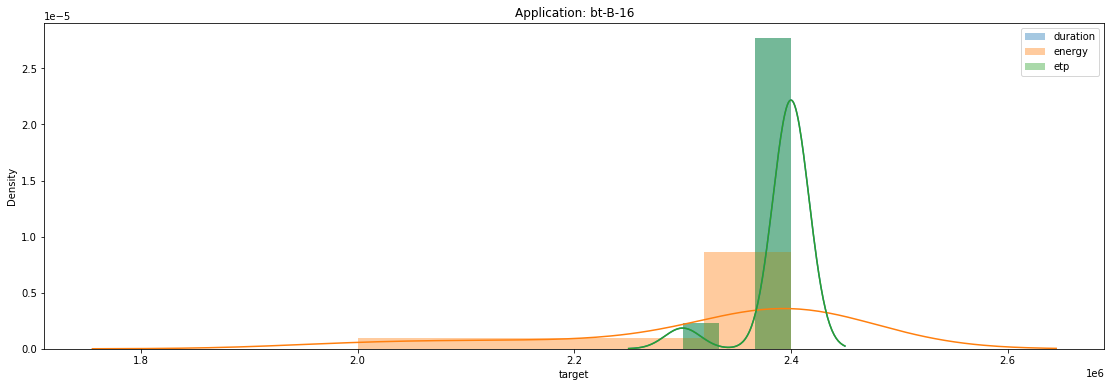

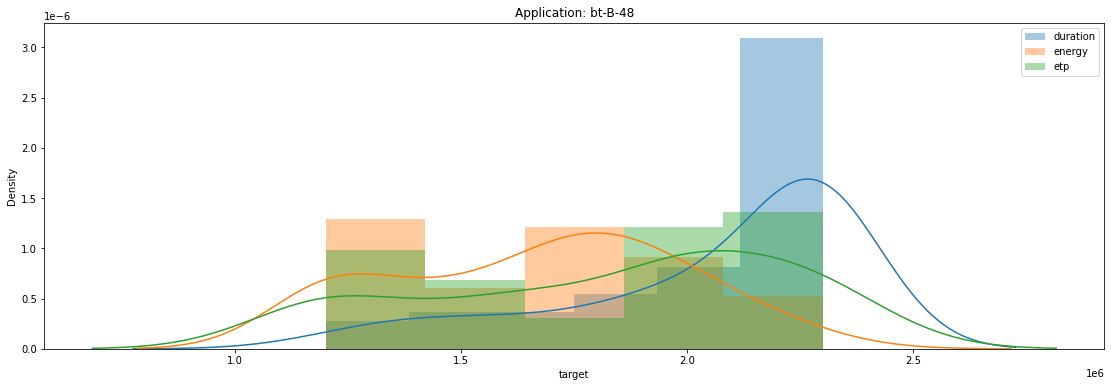

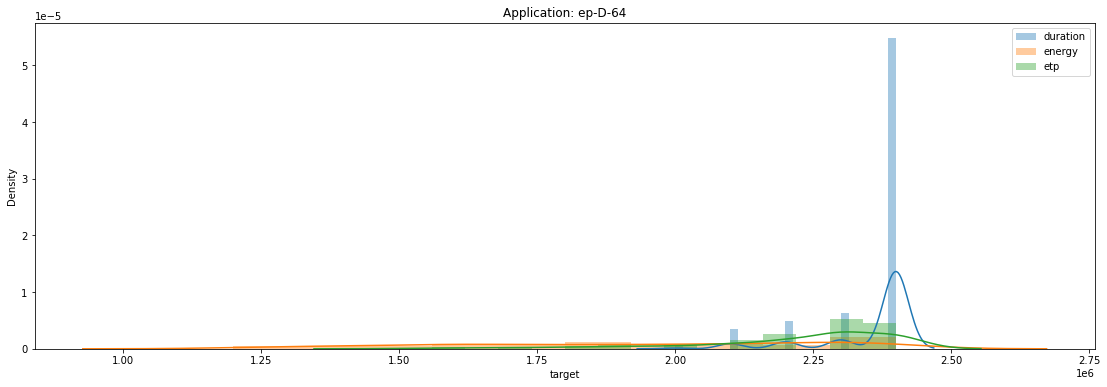

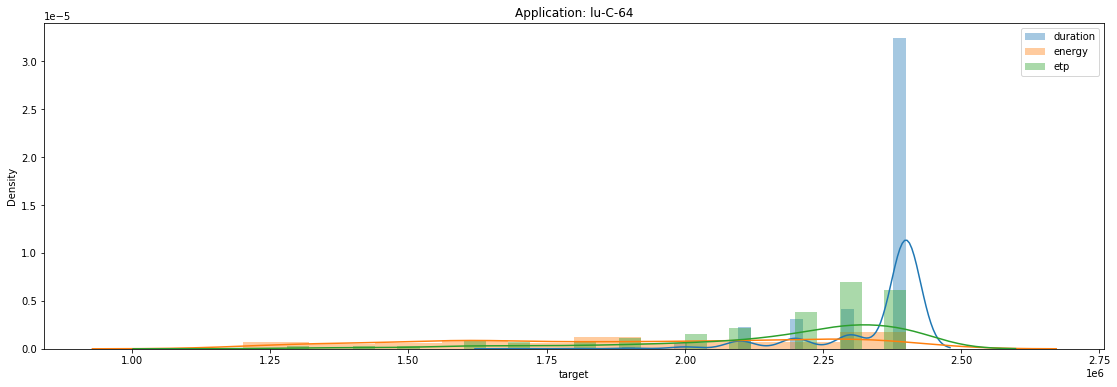

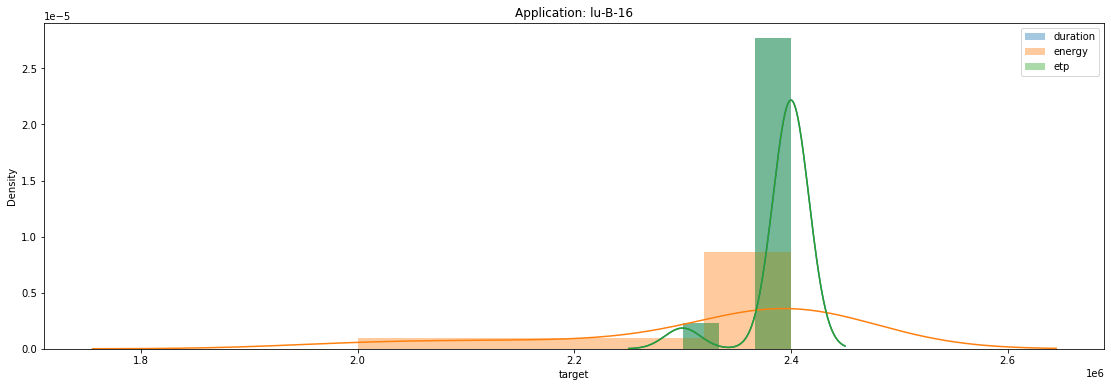

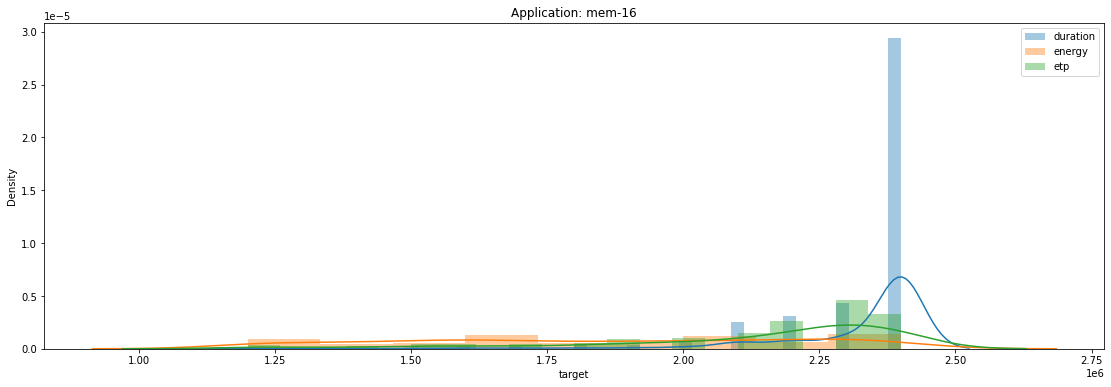

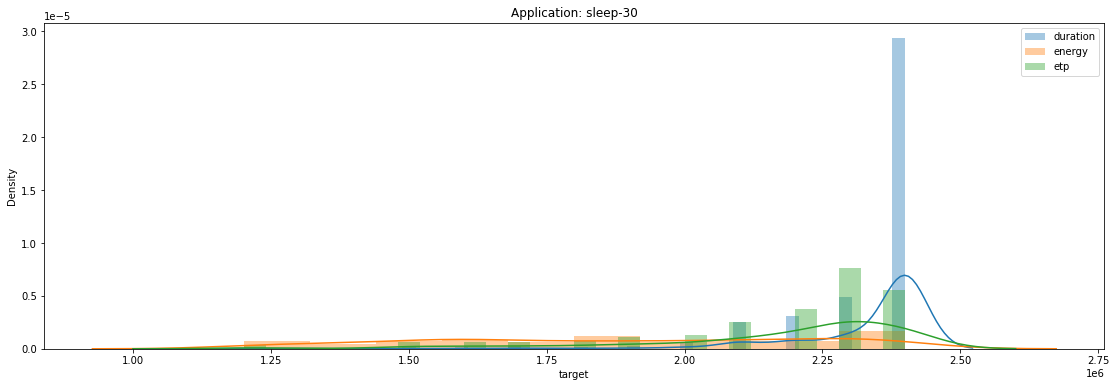

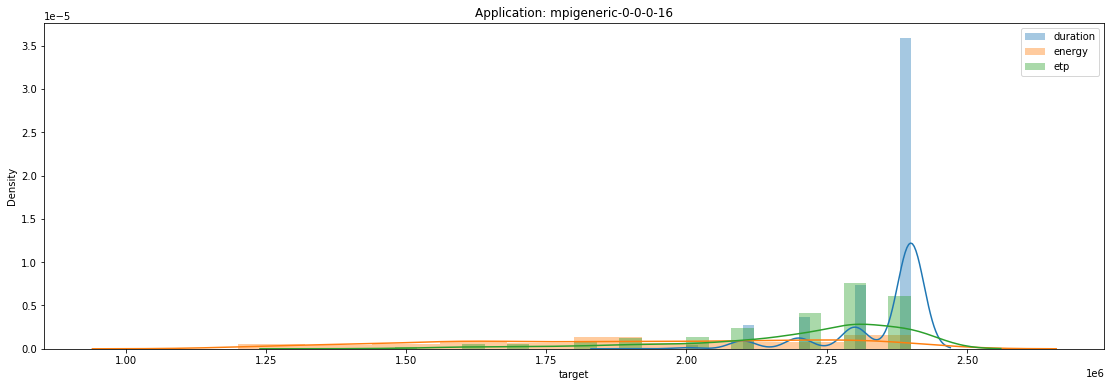

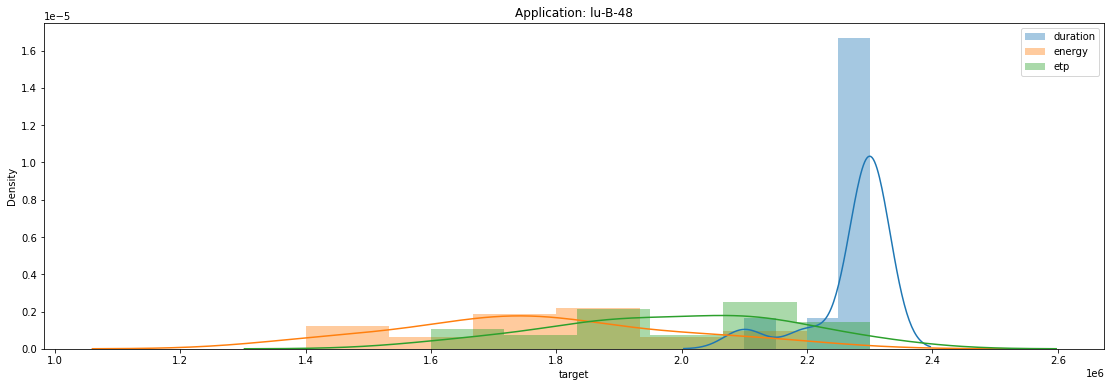

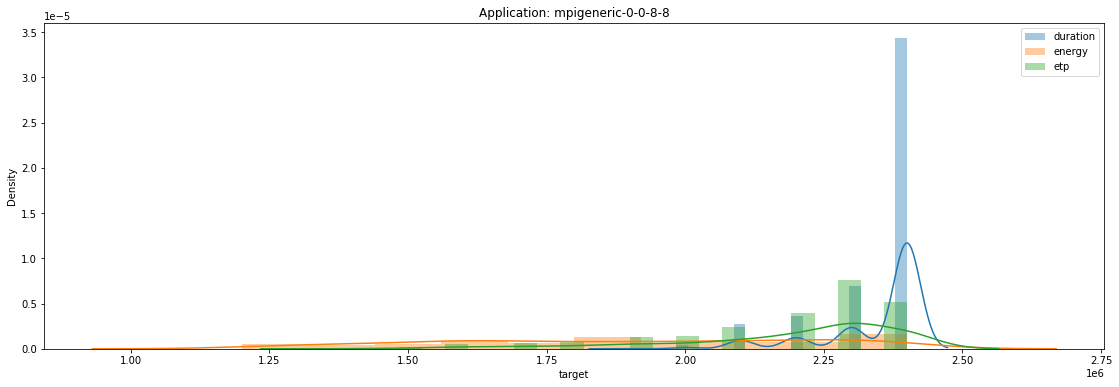

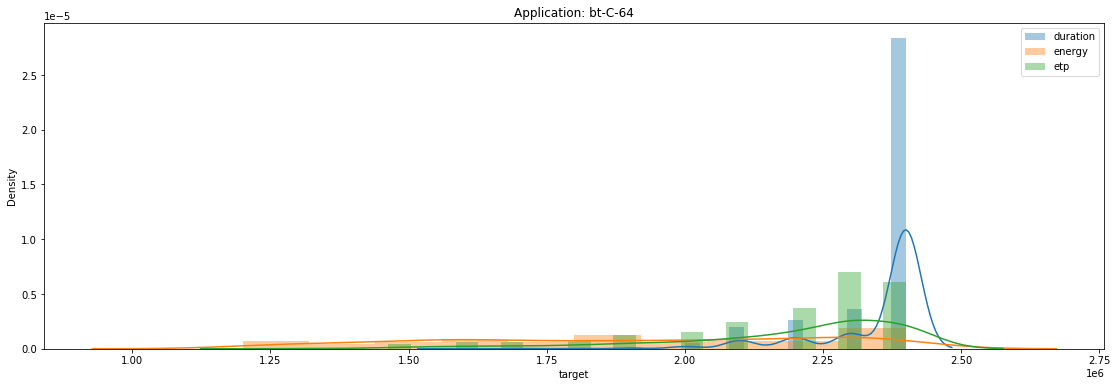

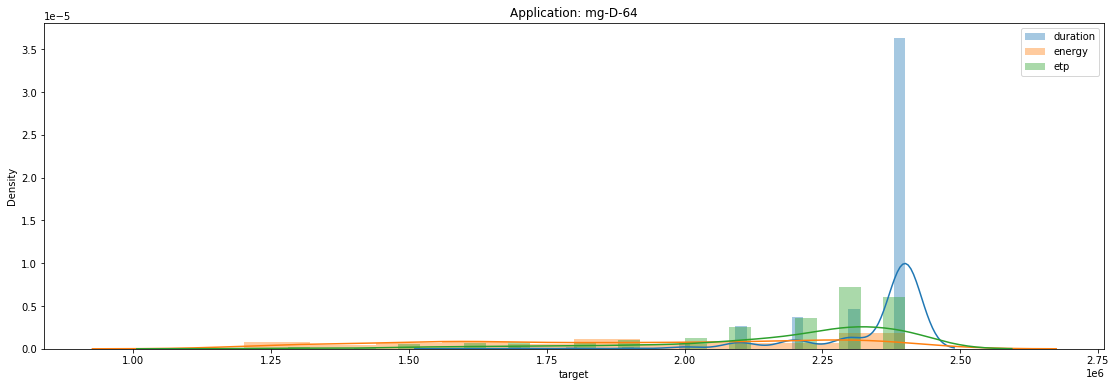

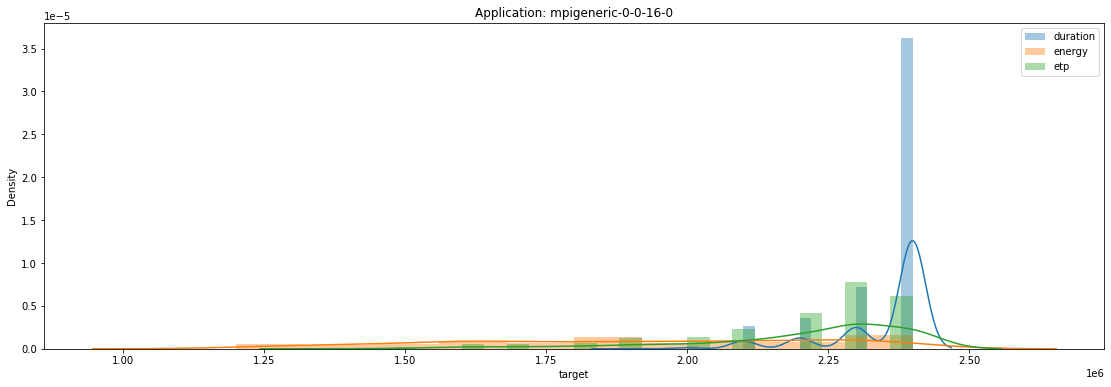

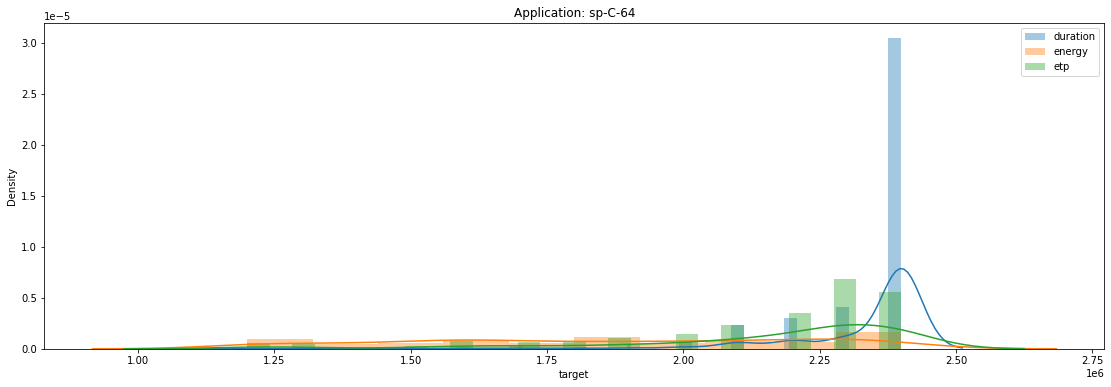

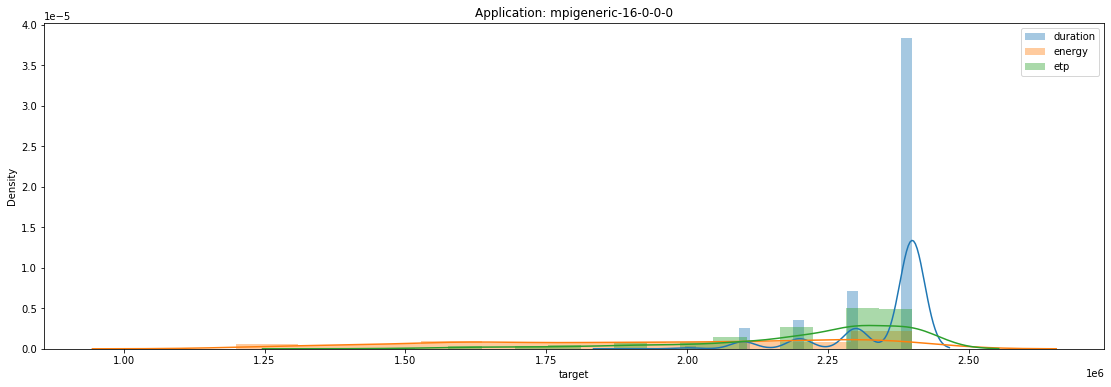

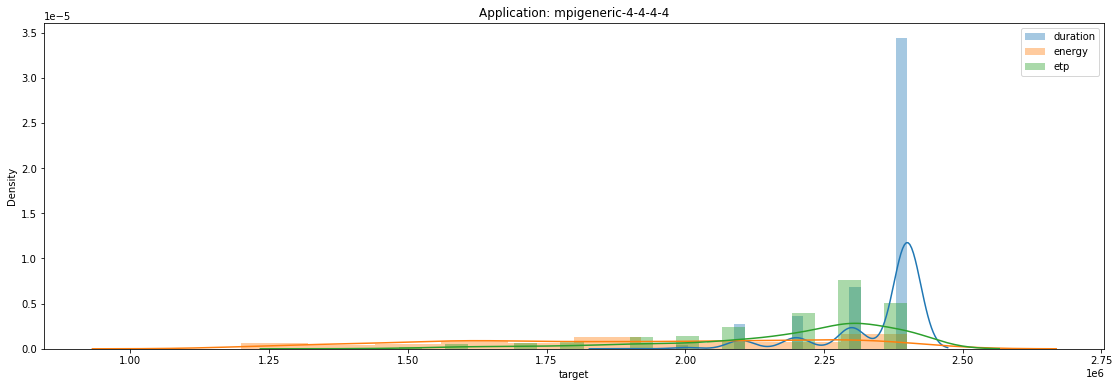

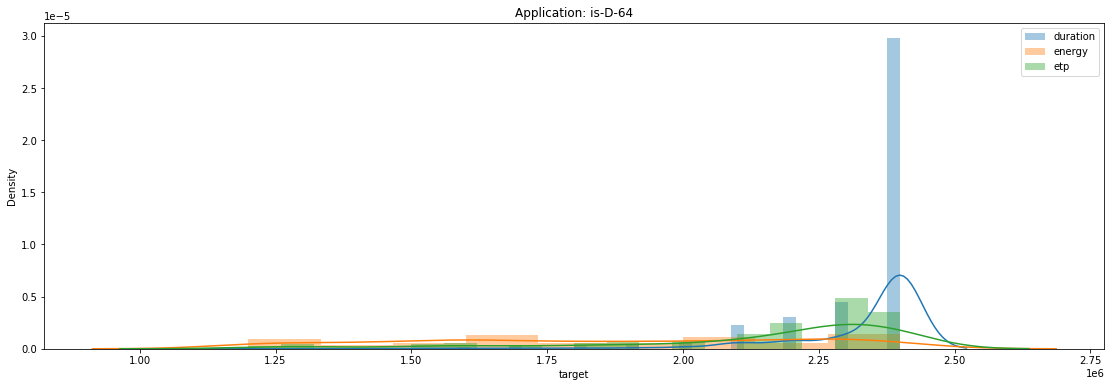

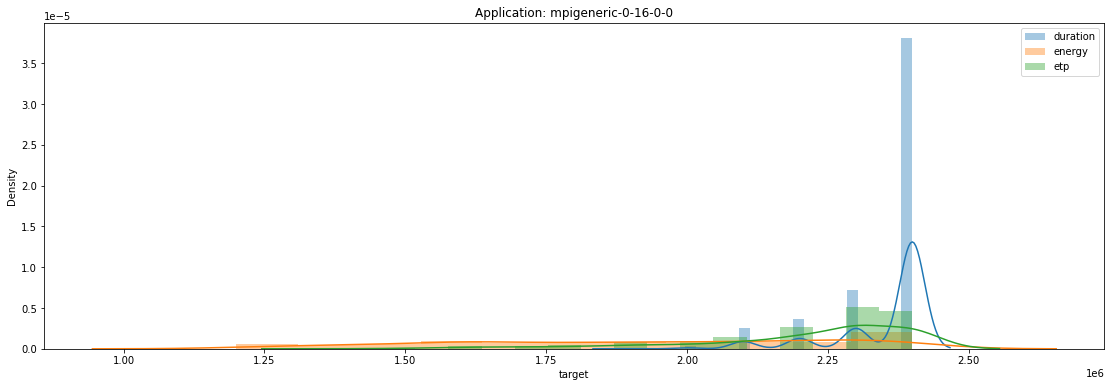

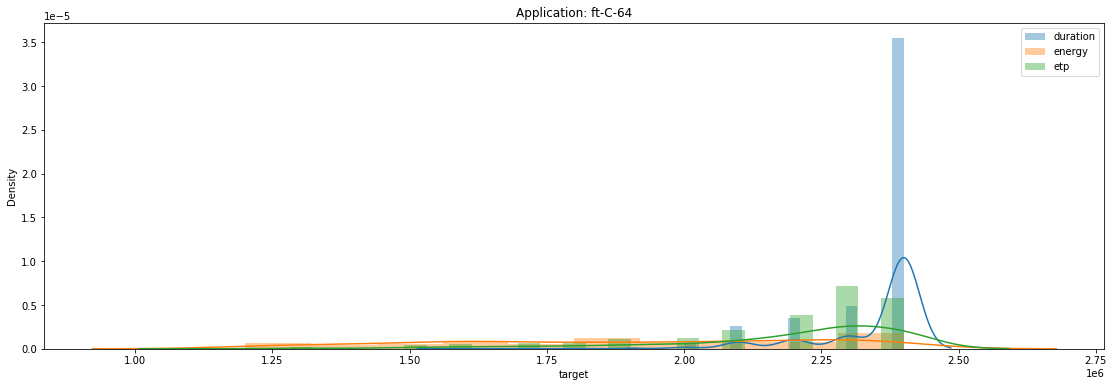

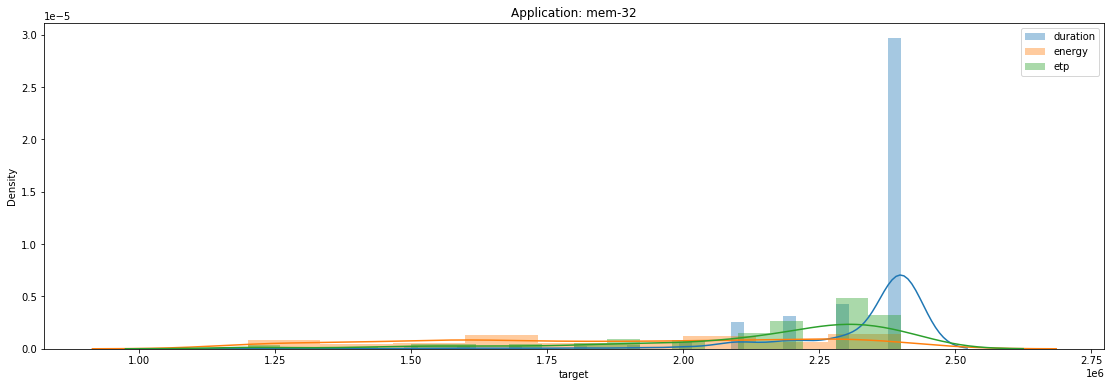

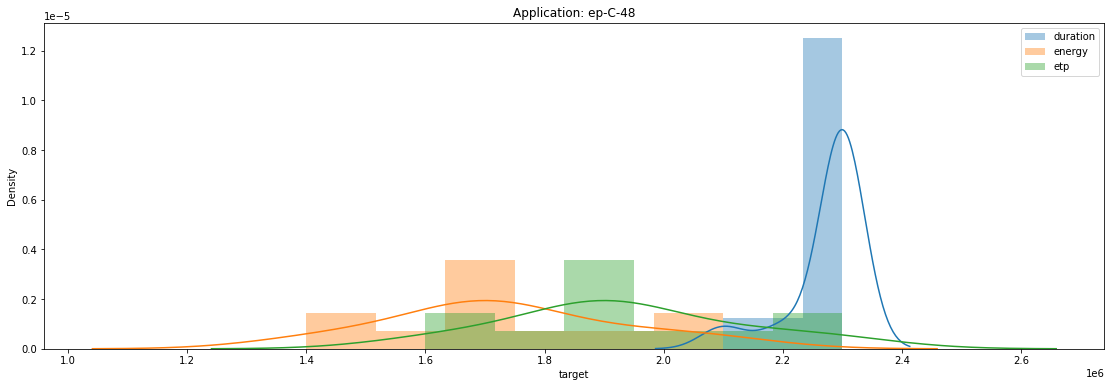

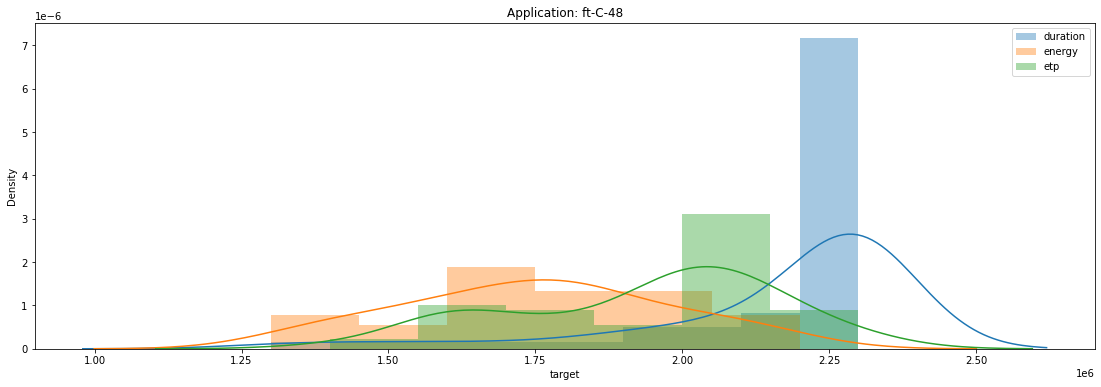

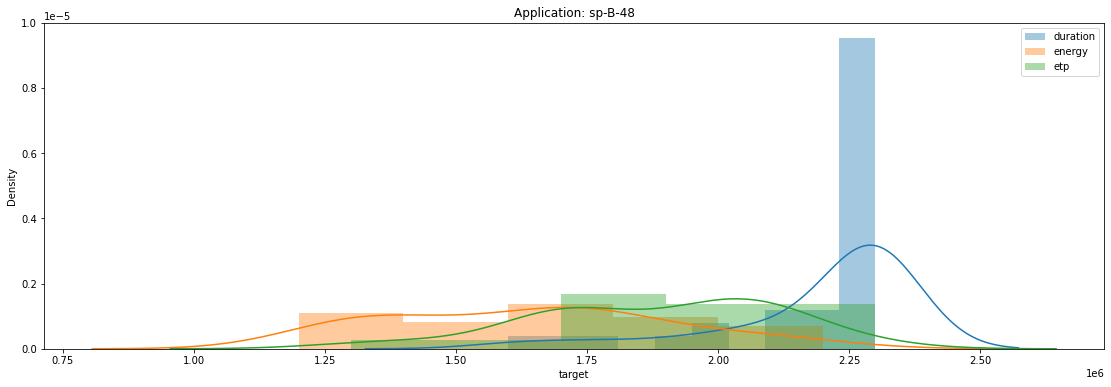

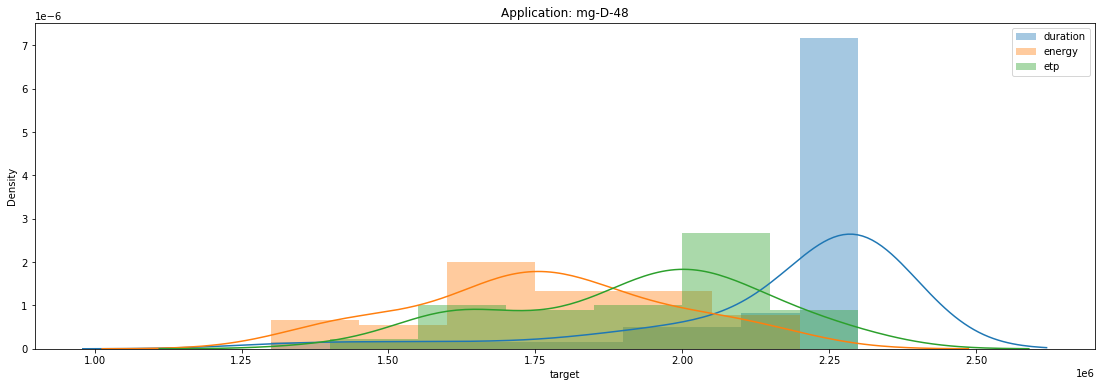

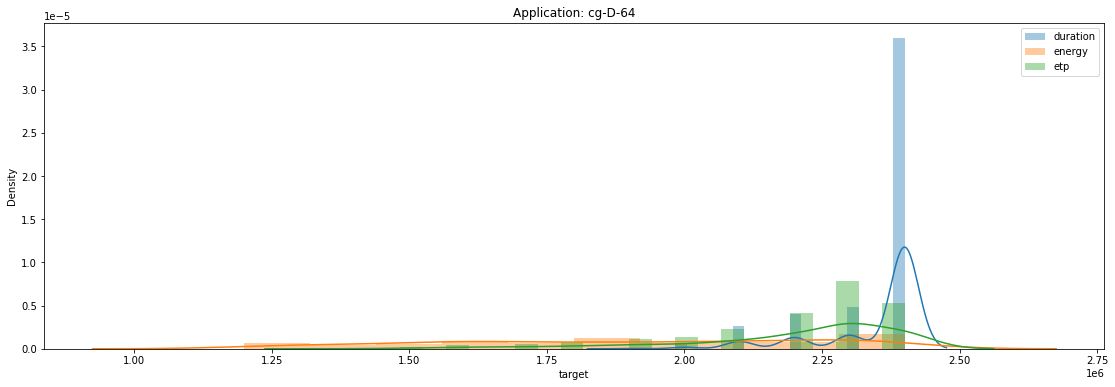

In [44]:
for name in nameofprograms:
    fig, ax = plt.subplots(figsize=[19, 6])
    tmp = knowledge[knowledge.fullname == name]
    sns.distplot(tmp[tmp.metric == 'duration'].target, label="duration");
    sns.distplot(tmp[tmp.metric == 'energy'].target, label="energy");
    sns.distplot(tmp[tmp.metric == 'etp'].target, label="etp");
    plt.title("Application: "+name)
    plt.legend()
    plt.show()

In [69]:
set(knowledge.target)

{1200000,
 1300000,
 1400000,
 1500000,
 1600000,
 1700000,
 1800000,
 1900000,
 2000000,
 2100000,
 2200000,
 2300000,
 2400000}

In [21]:
knowledge.target.value_counts()

2400000    16056
2300000     8506
2200000     4901
2100000     3754
2000000     2271
1900000     2100
1600000     2061
1800000     1692
1700000     1669
1500000     1334
1400000      918
1300000      901
1200000      649
Name: target, dtype: int64

### Statistical description of numerical variables

In [45]:
knowledge.describe()

,nproc,duration,startTime,endTime,fmin,fmax,expe,power,energy,etp,target,targetZ
count,46812.000000,46812.000000,4.681200e+04,4.681200e+04,46812.0,4.681200e+04,46812.000000,46812.000000,46812.000000,4.681200e+04,4.681200e+04,4.681200e+04
mean,63.155088,56.779608,1.601835e+09,1.601835e+09,1200000.0,1.797706e+06,76.874583,187.745994,10942.173290,1.340387e+06,2.130065e+06,1.072407e+06
std,3.919743,60.809550,5.042615e+06,5.042615e+06,0.0,3.730391e+05,40.151141,39.380666,12155.699607,4.766137e+06,3.224010e+05,1.153857e+06
min,16.000000,6.160000,1.589457e+09,1.589457e+09,1200000.0,1.200000e+06,0.000000,79.666667,1096.356800,6.753558e+03,1.200000e+06,0.000000e+00
25%,64.000000,30.000000,1.603141e+09,1.603141e+09,1200000.0,1.500000e+06,49.000000,161.767761,5094.319032,1.374975e+05,2.000000e+06,0.000000e+00
50%,64.000000,37.360000,1.603745e+09,1.603745e+09,1200000.0,1.800000e+06,74.000000,185.964615,7088.651155,2.615091e+05,2.300000e+06,0.000000e+00
75%,64.000000,57.779560,1.604359e+09,1.604359e+09,1200000.0,2.100000e+06,97.000000,217.817008,11093.872154,6.599860e+05,2.400000e+06,2.400000e+06
max,64.000000,994.750000,1.604424e+09,1.604424e+09,1200000.0,2.400000e+06,144.000000,290.409091,139813.372904,1.390794e+08,2.400000e+06,2.400000e+06


In [46]:
vectors

,ref_cpu_cycles,cpu_clock,branch_misses,cache_references,page_faults,context_switches,cpu_cycles,cache_dtlb,cache_op_read,alignment_faults,...,guest,guest_nice,irxp,irxb,itxp,itxb,core0,core1,freq,metric
0,1.171386e+09,3.069360e+09,1.326824e+06,4.036555e+06,194.704156,139.894866,5.240105e+08,1.119943e+08,1.158463e+08,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1200000,energy
1,1.178697e+09,3.076990e+09,1.543819e+06,4.275998e+06,230.388471,147.318296,5.752833e+08,1.120118e+08,1.085217e+08,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1300000,energy
2,1.186990e+09,3.082000e+09,1.667409e+06,4.428871e+06,323.041667,154.054688,6.138289e+08,1.190939e+08,1.206594e+08,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1400000,energy
3,1.193797e+09,3.087653e+09,1.787191e+06,4.717843e+06,132.236702,157.664894,6.694202e+08,1.449491e+08,1.396374e+08,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1500000,energy
4,1.138394e+09,3.094404e+09,1.835530e+06,4.475046e+06,164.174863,158.849727,6.668155e+08,1.289870e+08,1.391217e+08,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1600000,energy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46807,6.492267e+08,3.122470e+09,8.749247e+05,6.774552e+05,0.002079,107.390852,4.871824e+08,4.375409e+08,4.425976e+08,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2000000,etp
46808,7.653543e+08,3.126823e+09,1.122749e+06,1.003358e+06,0.002165,115.194805,6.177618e+08,5.473929e+08,3.908299e+08,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2100000,etp
46809,7.729458e+08,3.128077e+09,1.101810e+06,8.496365e+05,0.522678,114.764579,6.478977e+08,5.234665e+08,5.207591e+08,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2200000,etp
46810,7.330967e+08,3.130436e+09,1.280062e+06,1.047491e+06,0.059211,115.230263,6.932083e+08,5.543307e+08,4.496717e+08,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2300000,etp


In [47]:
vectors.describe()

,ref_cpu_cycles,cpu_clock,branch_misses,cache_references,page_faults,context_switches,cpu_cycles,cache_dtlb,cache_op_read,alignment_faults,...,steal,guest,guest_nice,irxp,irxb,itxp,itxb,core0,core1,freq
count,4.681200e+04,4.681200e+04,4.681200e+04,4.681200e+04,46812.000000,46812.000000,4.681200e+04,4.681200e+04,4.681200e+04,46812.0,...,46812.0,46812.0,46812.0,11271.000000,1.127100e+04,11271.000000,1.127100e+04,2.160000e+03,2.160000e+03,4.681200e+04
mean,7.637734e+08,3.041777e+09,1.169447e+06,4.285264e+06,110.249718,142.662376,4.773017e+08,1.616884e+08,1.675158e+08,0.0,...,0.0,0.0,0.0,8833.237552,3.452821e+06,8827.564529,3.450253e+06,2.365635e+06,2.362407e+06,1.797706e+06
std,2.797967e+08,1.854393e+08,1.604872e+06,7.840599e+06,289.843644,228.655145,2.199832e+08,1.301685e+08,1.373597e+08,0.0,...,0.0,0.0,0.0,11283.950000,4.242644e+06,11282.265853,4.240639e+06,9.417465e+05,9.670524e+05,3.730391e+05
min,1.481644e+07,1.626244e+09,1.518569e+03,3.654906e+03,0.000000,21.875519,5.261342e+06,1.027011e+05,9.781797e+04,0.0,...,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,2.332630e+05,2.455413e+05,1.200000e+06
25%,6.449591e+08,3.074406e+09,6.428645e+04,4.677749e+05,0.000000,46.664118,3.477221e+08,7.762691e+07,7.903251e+07,0.0,...,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,1.671056e+06,1.671090e+06,1.500000e+06
50%,7.392023e+08,3.098087e+09,5.099505e+05,1.820575e+06,3.538285,91.994938,4.569003e+08,1.402814e+08,1.447203e+08,0.0,...,0.0,0.0,0.0,5650.635802,1.562204e+06,5652.753666,1.562205e+06,2.309847e+06,2.334781e+06,1.800000e+06
75%,9.201023e+08,3.114900e+09,1.626119e+06,4.668389e+06,62.815436,164.088403,5.974163e+08,2.271709e+08,2.337426e+08,0.0,...,0.0,0.0,0.0,13796.259574,6.022713e+06,13738.945441,6.022712e+06,3.087994e+06,3.125360e+06,2.100000e+06
max,2.209335e+09,3.142658e+09,1.052096e+07,8.120245e+07,3692.688312,5592.121751,2.022286e+09,9.153634e+08,1.003960e+09,0.0,...,0.0,0.0,0.0,52574.776786,1.704233e+07,52575.464286,1.704220e+07,4.559584e+06,4.526826e+06,2.400000e+06


In [58]:
vectors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46812 entries, 0 to 46811
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ref_cpu_cycles       46812 non-null  float64
 1   cpu_clock            46812 non-null  float64
 2   branch_misses        46812 non-null  float64
 3   cache_references     46812 non-null  float64
 4   page_faults          46812 non-null  float64
 5   context_switches     46812 non-null  float64
 6   cpu_cycles           46812 non-null  float64
 7   cache_dtlb           46812 non-null  float64
 8   cache_op_read        46812 non-null  float64
 9   alignment_faults     46812 non-null  float64
 10  cache_node           46812 non-null  float64
 11  task_clock           46812 non-null  float64
 12  bus_cycles           46812 non-null  float64
 13  bpf_output           46812 non-null  float64
 14  cache_l1d            46812 non-null  float64
 15  cache_itlb           46812 non-null 

### Boxplot of numerical variables & Handling Outliers
We can look at blow box plot to see the properties of each variable. Some variable can be handle the outlier of values. Also we can se some feature has no meaning -> remove.

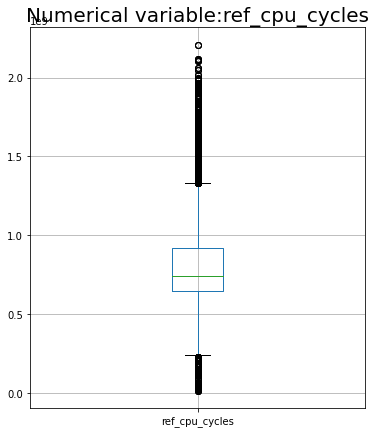

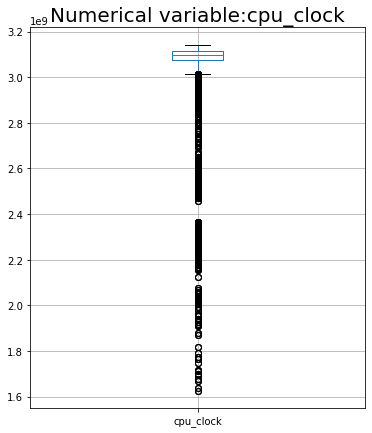

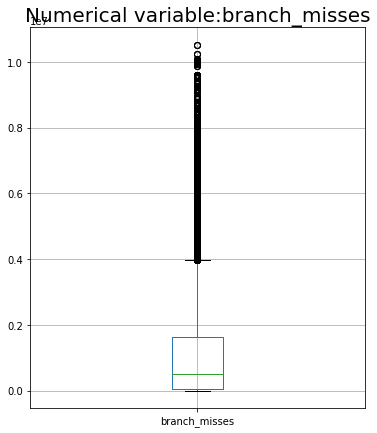

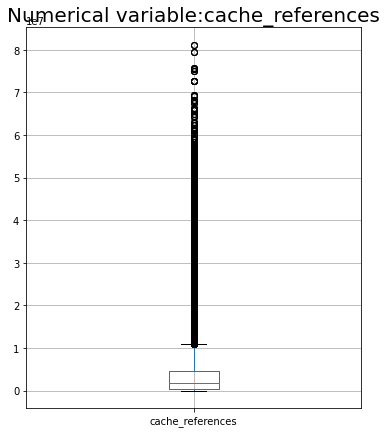

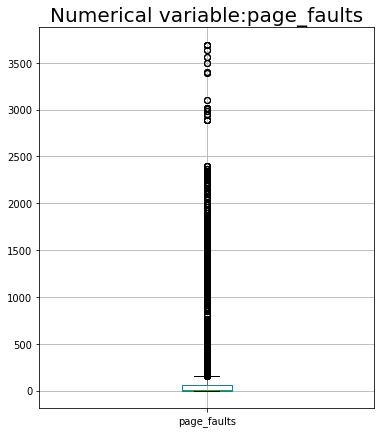

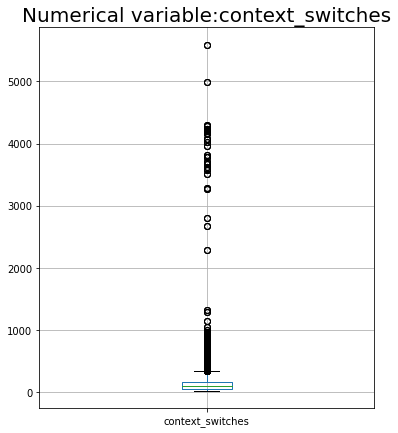

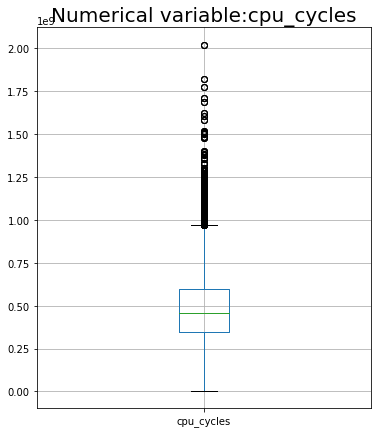

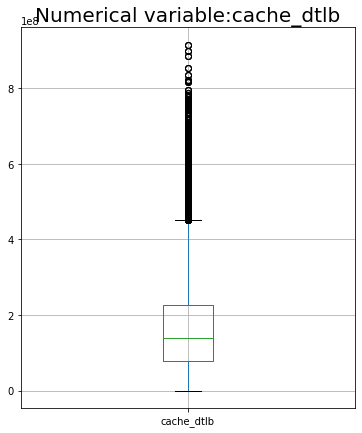

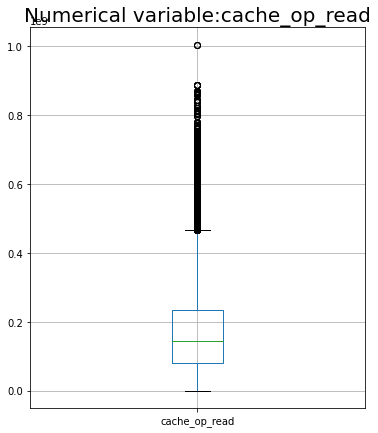

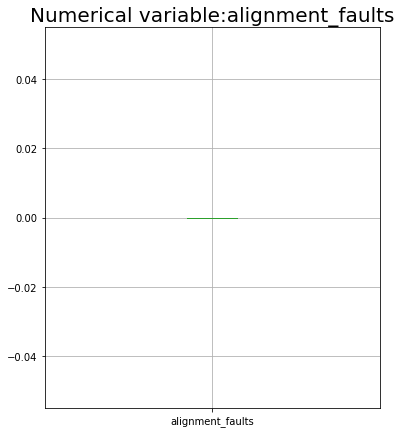

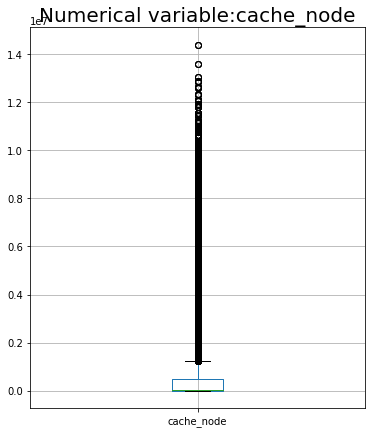

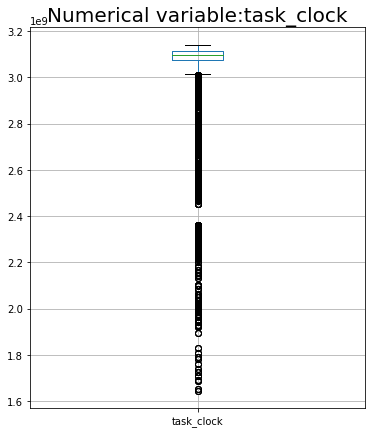

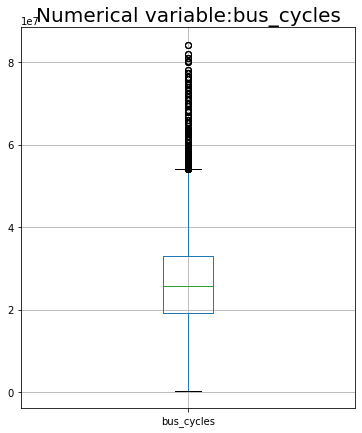

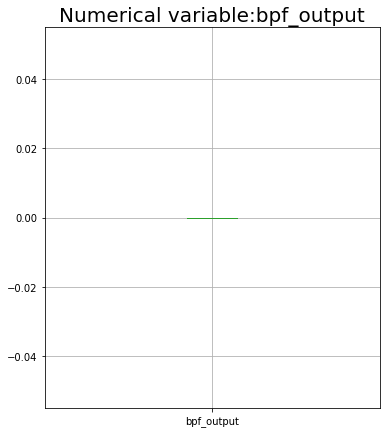

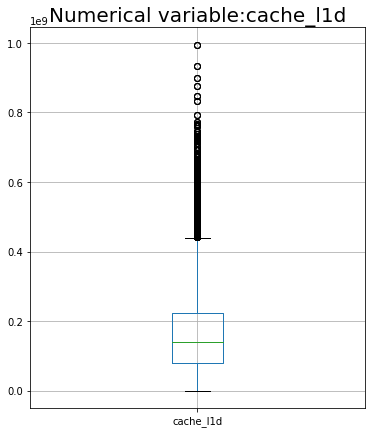

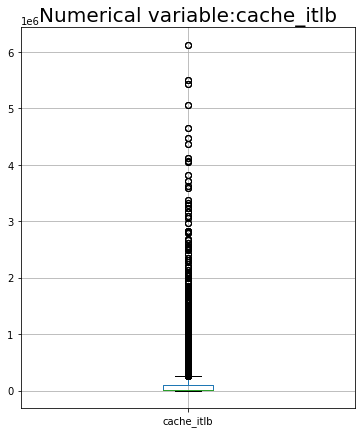

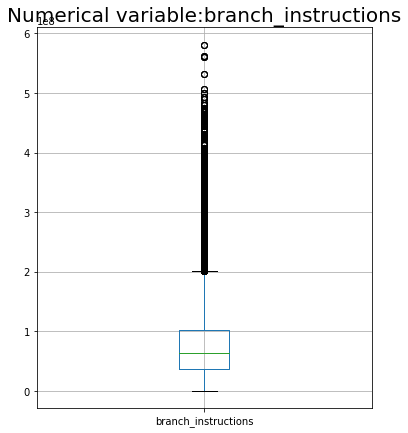

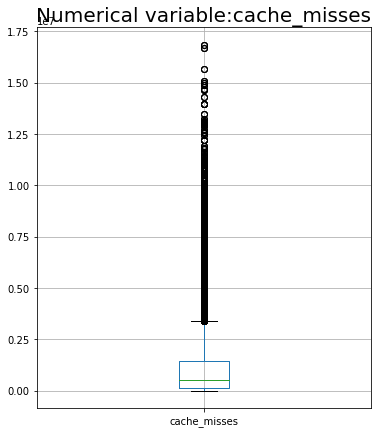

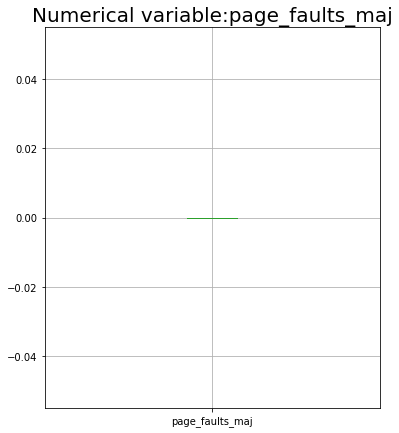

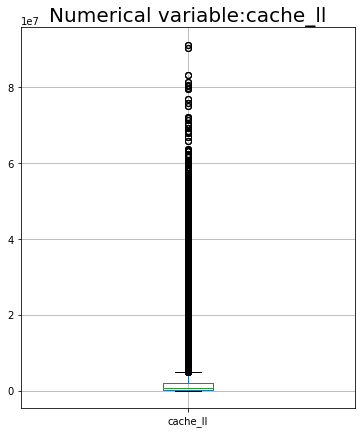

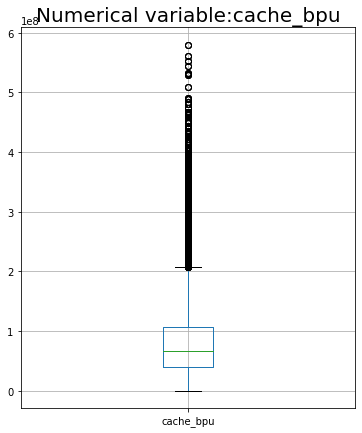

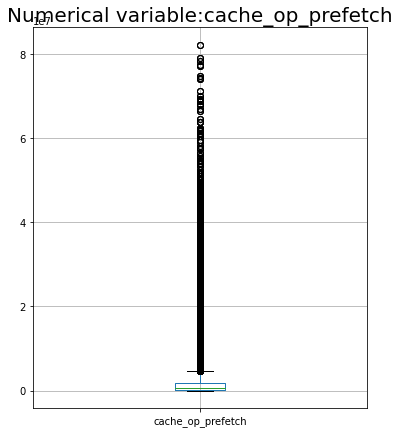

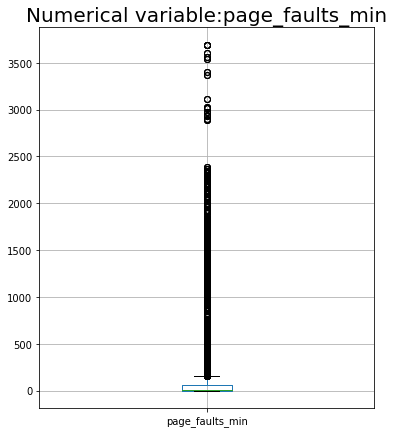

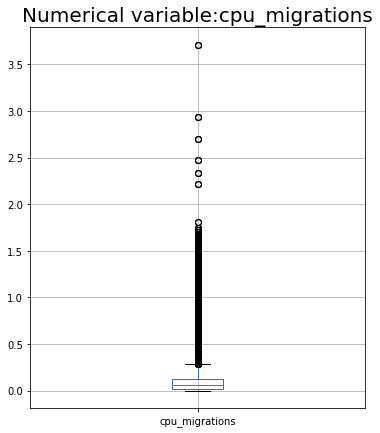

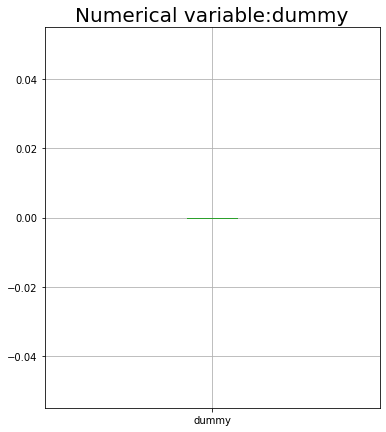

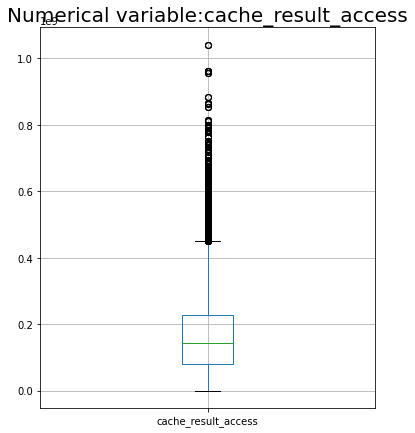

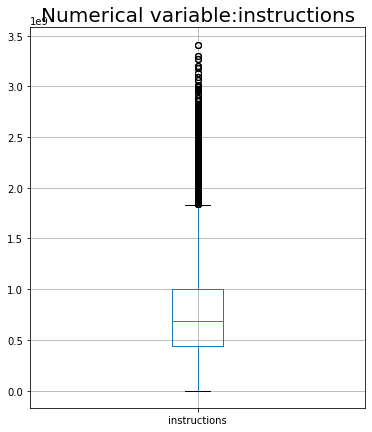

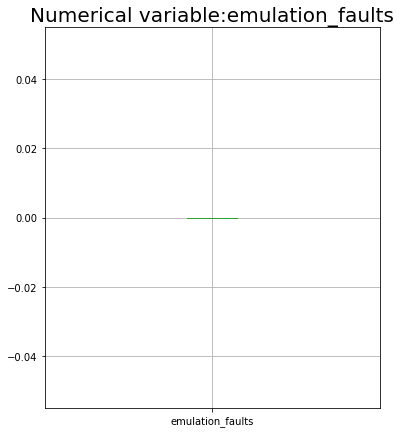

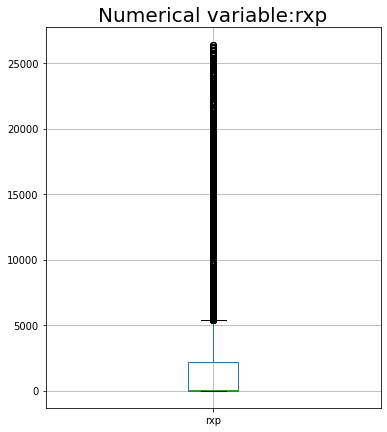

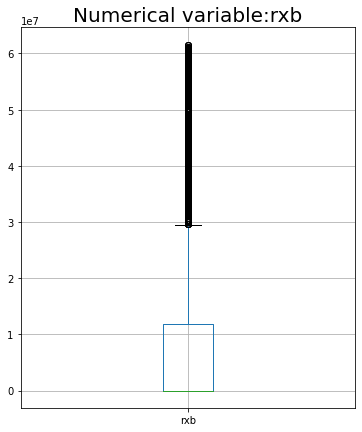

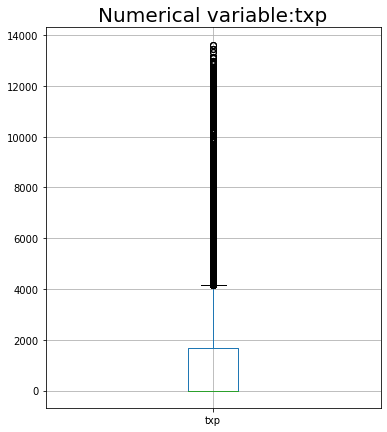

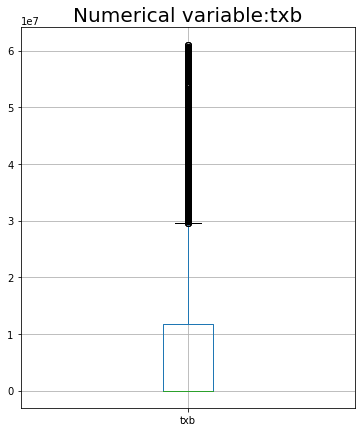

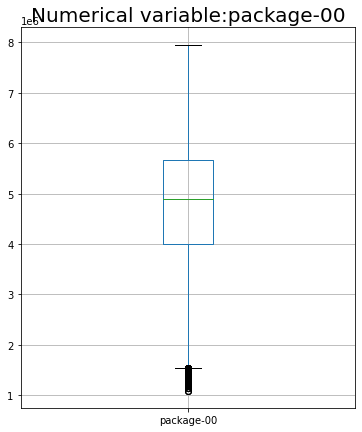

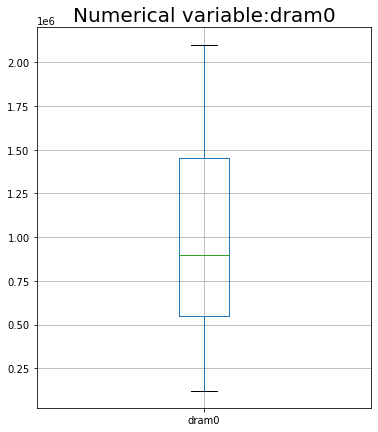

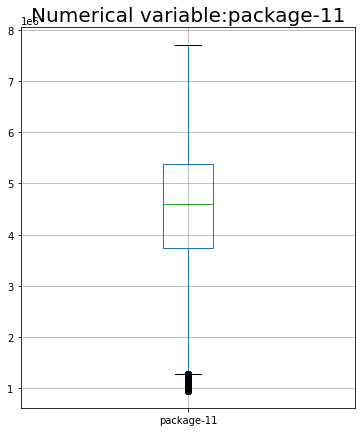

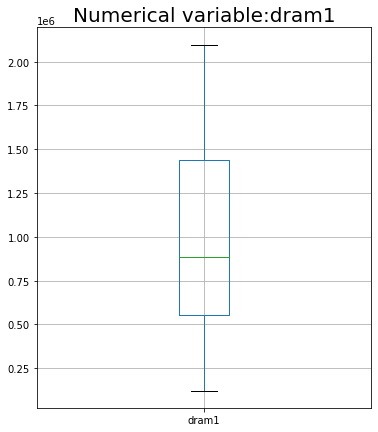

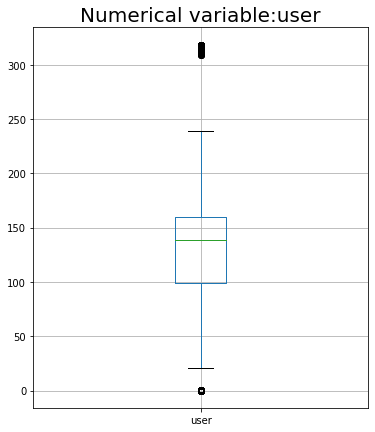

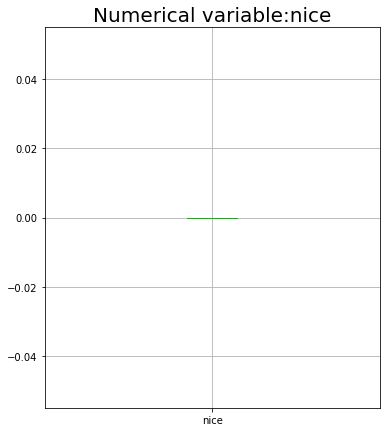

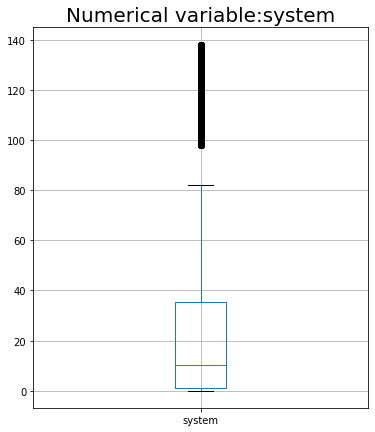

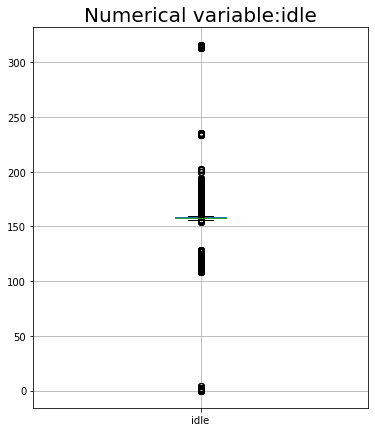

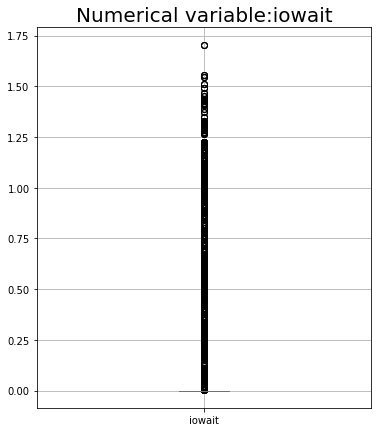

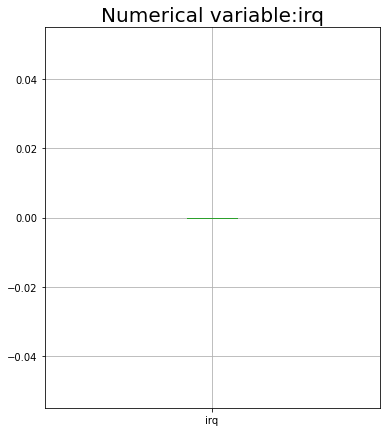

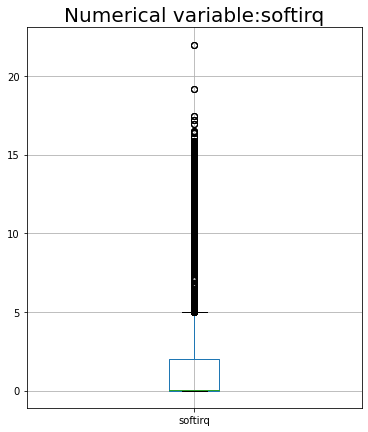

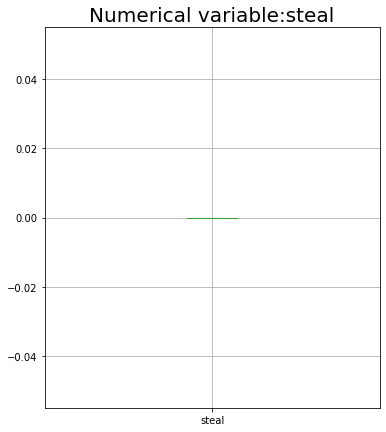

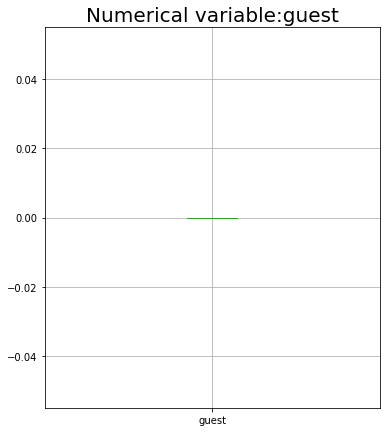

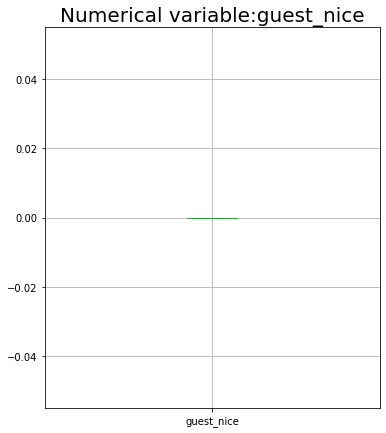

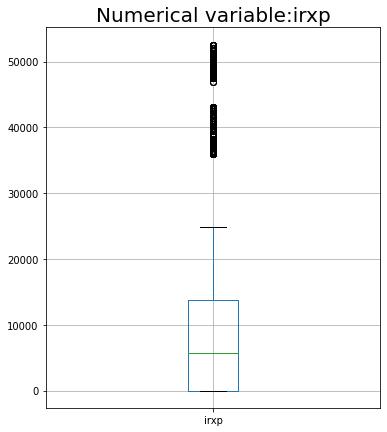

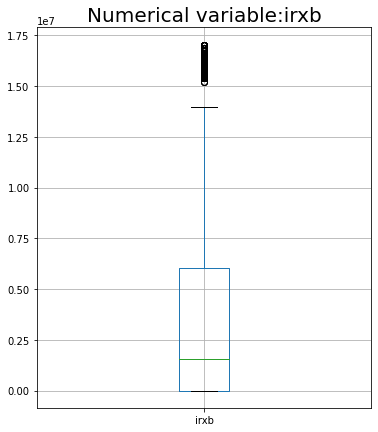

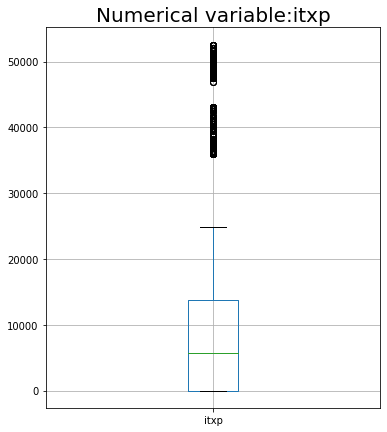

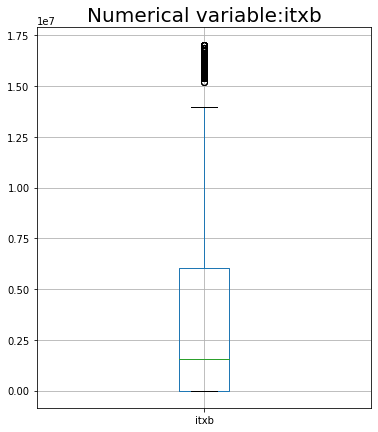

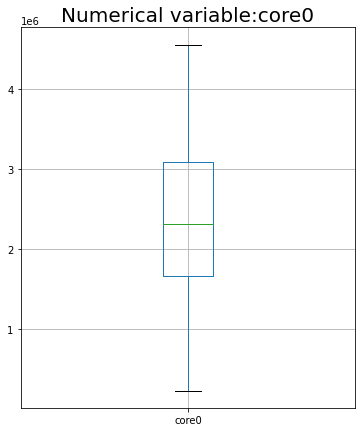

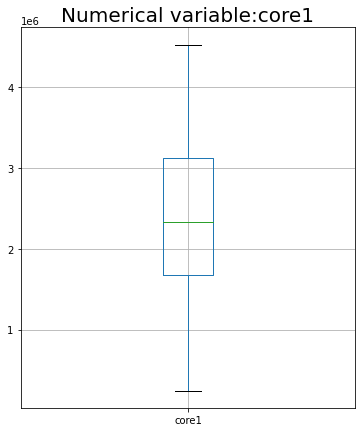

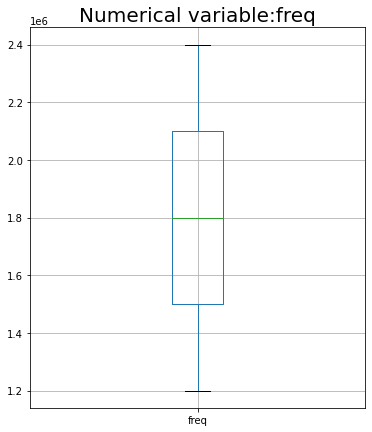

ZeroDivisionError: integer division or modulo by zero

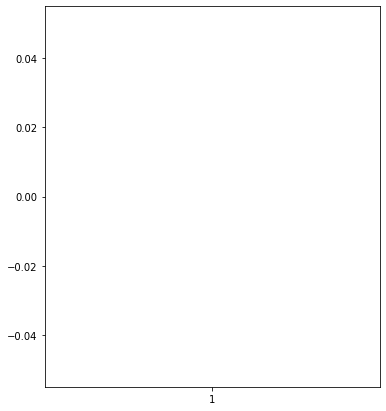

In [49]:
for col in vectors.columns:
    plt.figure(figsize=(6,7))
    vectors[[col]].boxplot()
    plt.title("Numerical variable:"+col, fontsize=20)
    plt.show()

## Distributions of features

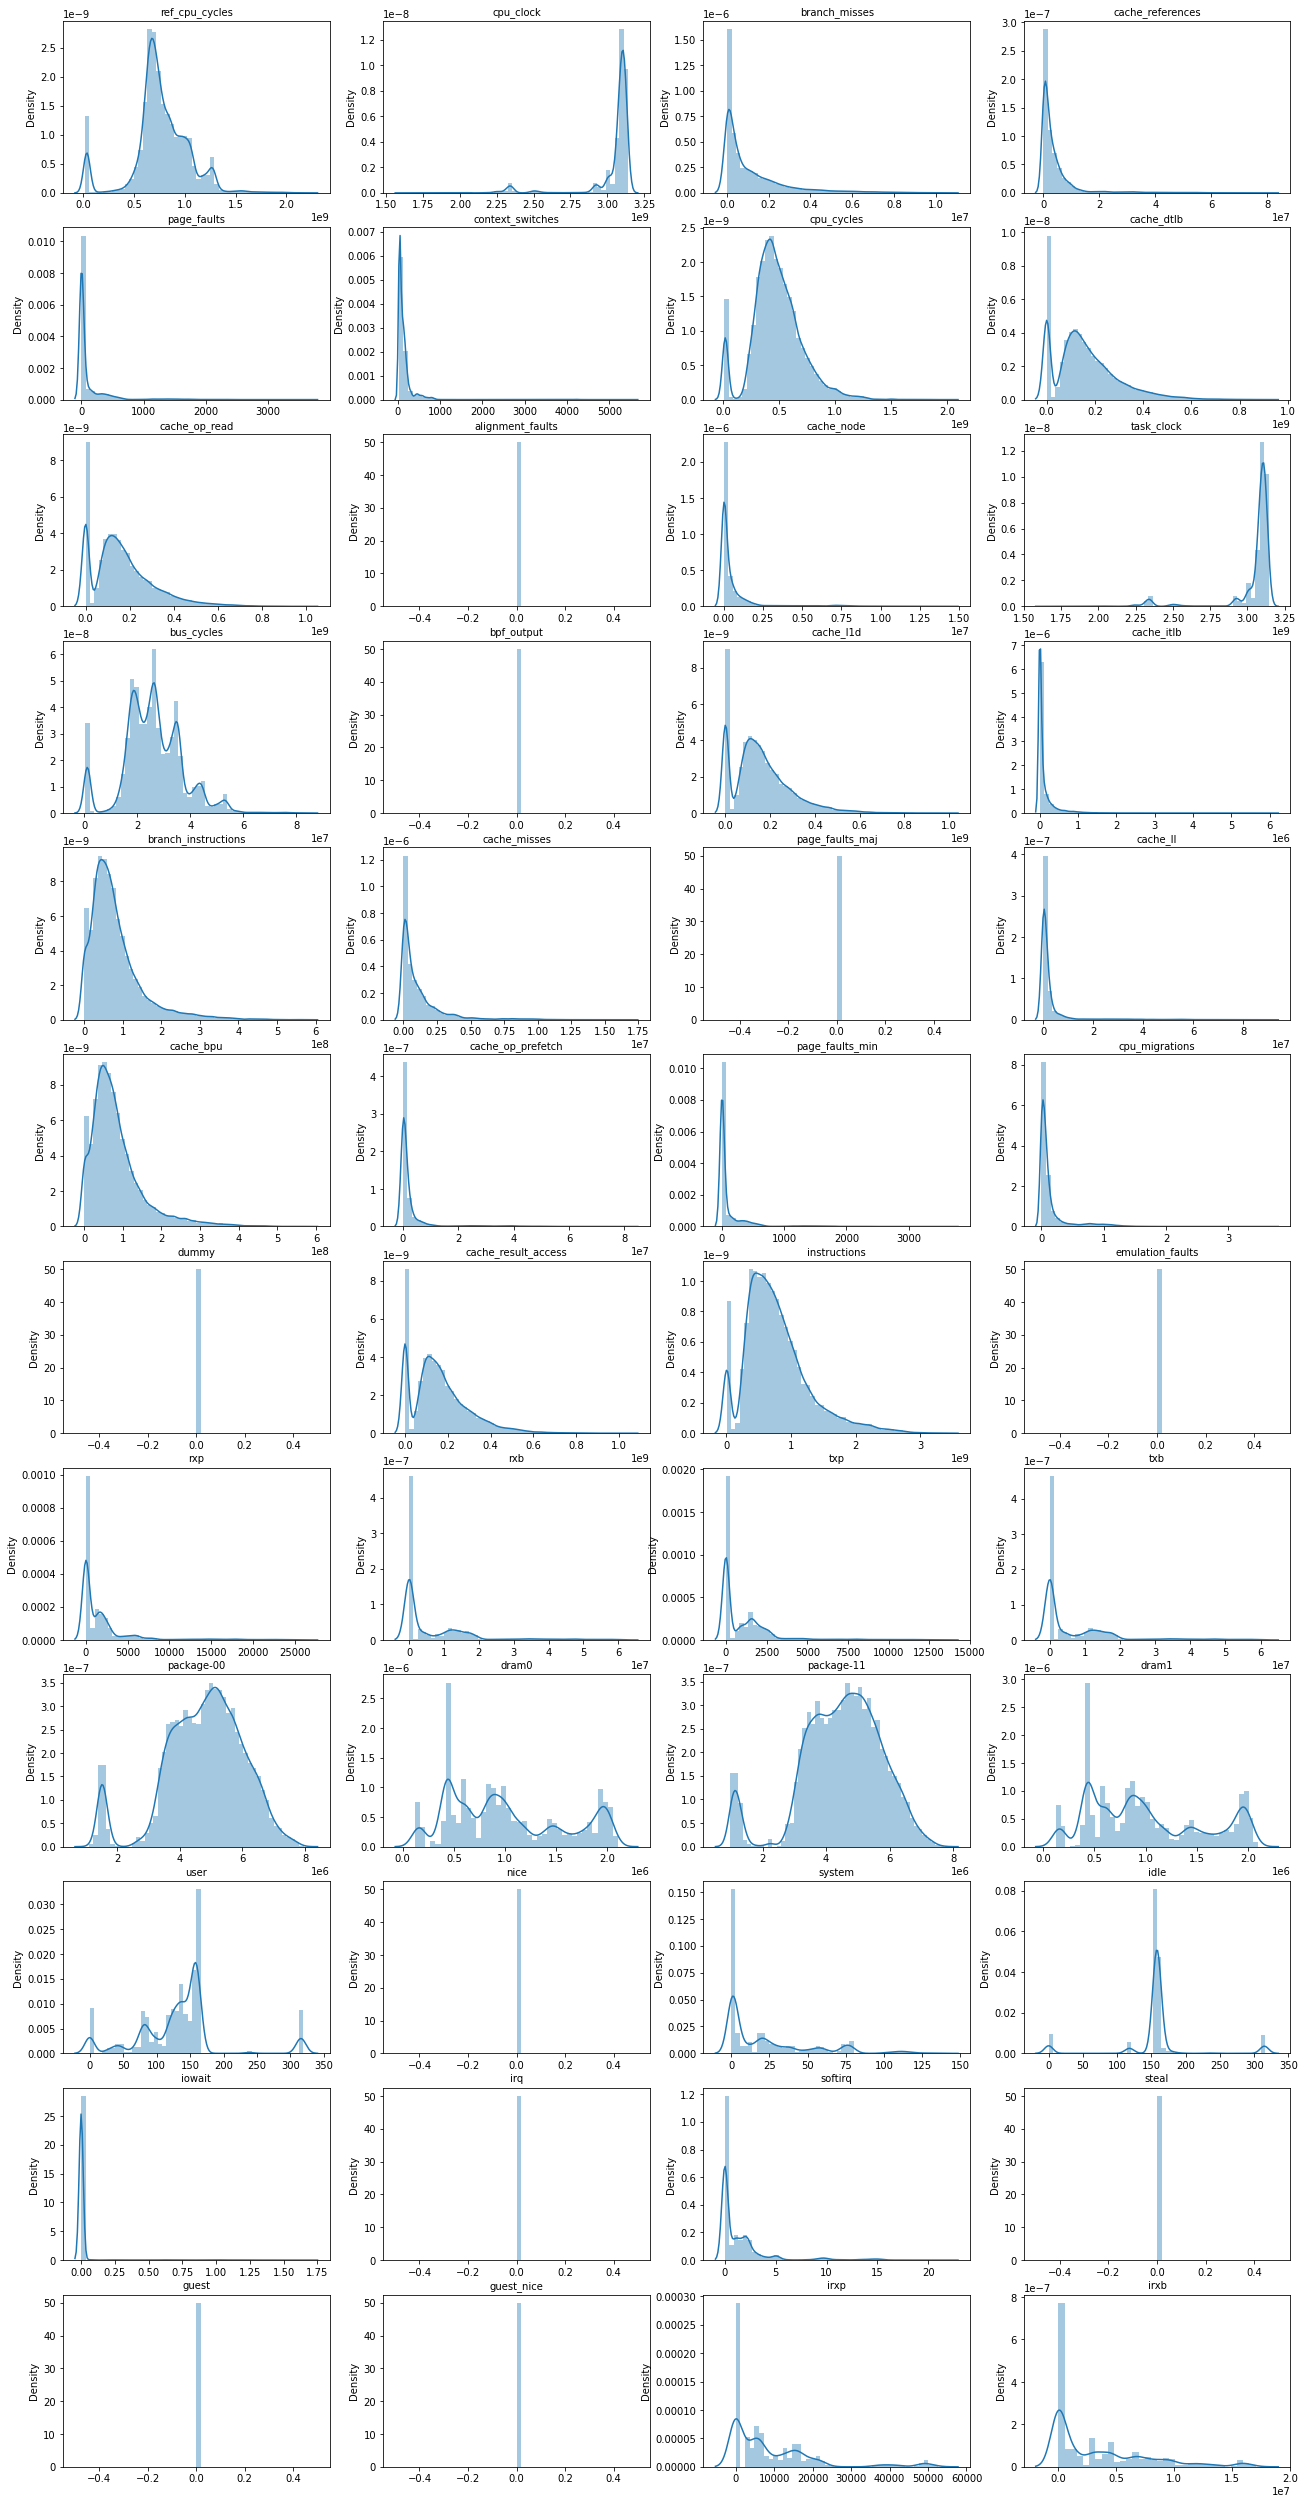

In [50]:
def plot_dist(col, ax):
    sns.distplot(vectors[col],ax=ax)
    ax.set_xlabel('', fontsize=10)
    ax.set_title("{}".format(col), fontsize= 10)
    return ax

f, ax = plt.subplots(12,4, figsize = (22,45))
f.tight_layout(h_pad=47, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = vectors.columns
k = 0
for i in range(12):
    for j in range(4):
        plot_dist(cols[k], ax[i][j])
        if k >= len(cols)-1:
            break
        k += 1
#__ = plt.suptitle("Initial Distributions of features", fontsize= 25)

In [53]:
vectors.columns

Index(['ref_cpu_cycles', 'cpu_clock', 'branch_misses', 'cache_references',
       'page_faults', 'context_switches', 'cpu_cycles', 'cache_dtlb',
       'cache_op_read', 'alignment_faults', 'cache_node', 'task_clock',
       'bus_cycles', 'bpf_output', 'cache_l1d', 'cache_itlb',
       'branch_instructions', 'cache_misses', 'page_faults_maj', 'cache_ll',
       'cache_bpu', 'cache_op_prefetch', 'page_faults_min', 'cpu_migrations',
       'dummy', 'cache_result_access', 'instructions', 'emulation_faults',
       'rxp', 'rxb', 'txp', 'txb', 'package-00', 'dram0', 'package-11',
       'dram1', 'user', 'nice', 'system', 'idle', 'iowait', 'irq', 'softirq',
       'steal', 'guest', 'guest_nice', 'irxp', 'irxb', 'itxp', 'itxb', 'core0',
       'core1', 'freq', 'metric'],
      dtype='object')

## Relation of features to target

We see that for some features like 'cpu_clock, rxb, ...' there is a strong linear correlation **r** to the target. p is p-value

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

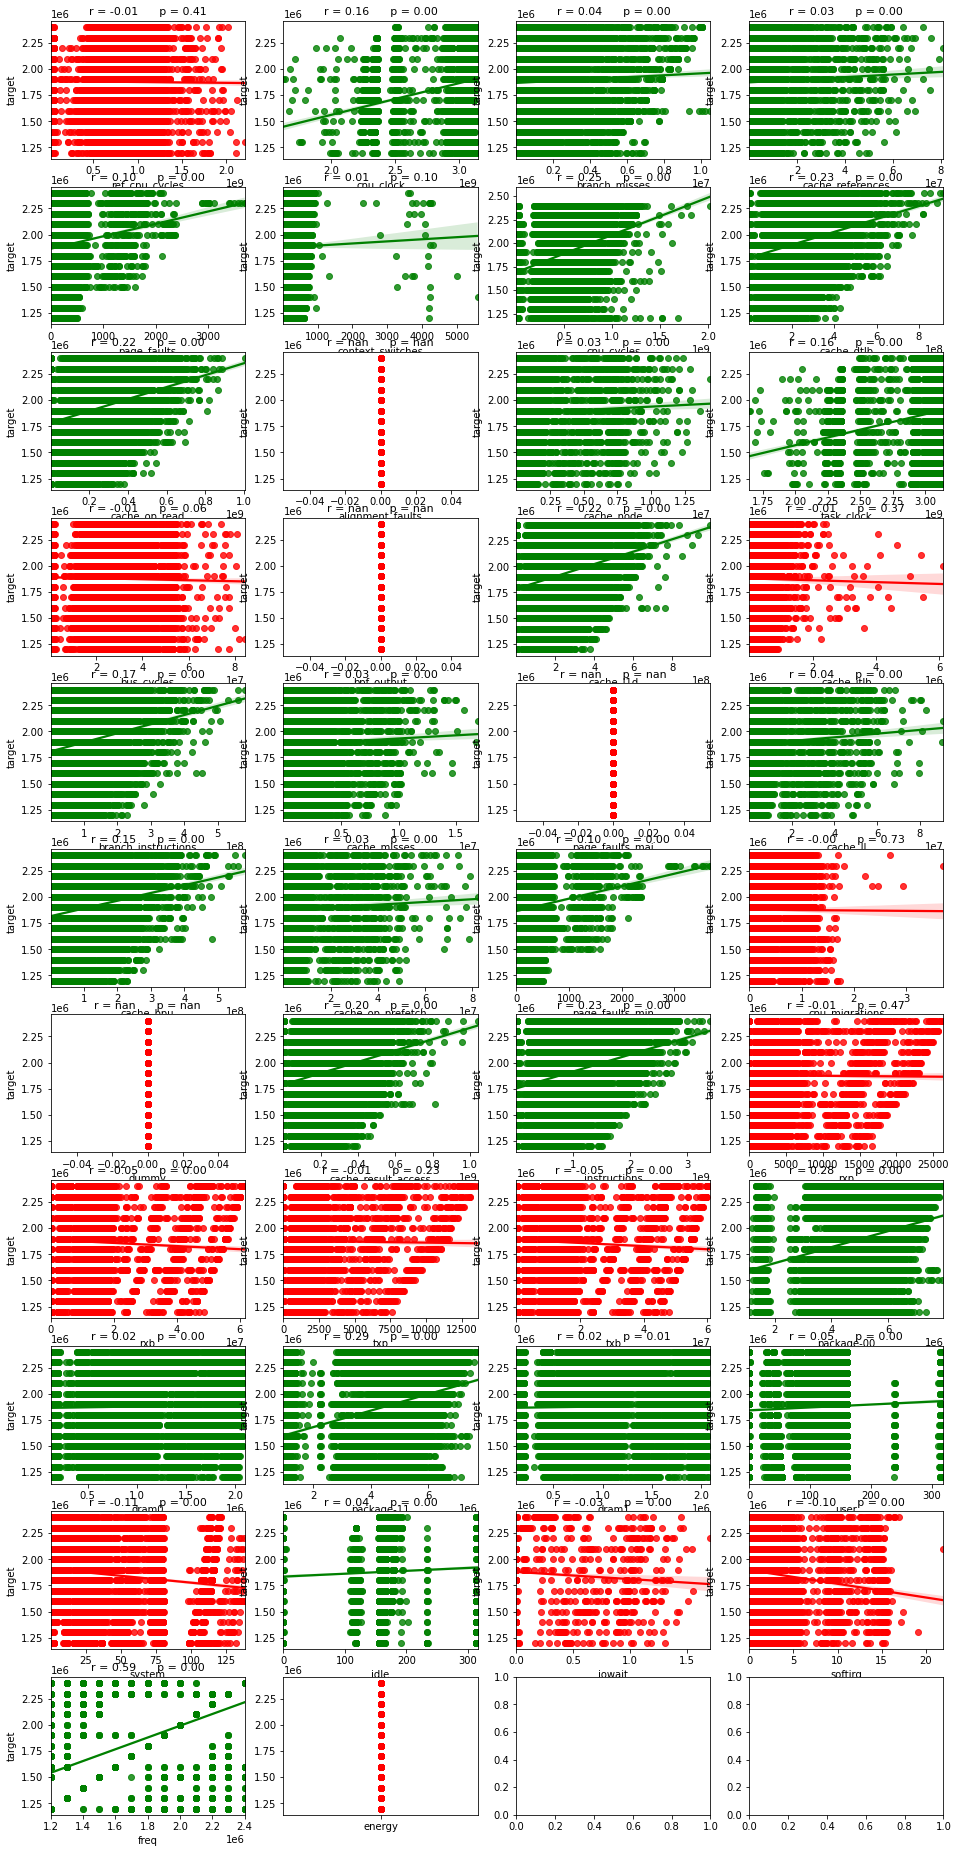

In [55]:
nr_rows = 11
nr_cols = 4

metric = 'energy'
tmp = vectors[vectors.metric == metric]
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

li_num_feats = list(tmp.columns)
li_not_plot = ['guest', 'guest_nice', 'irq','steal','nice','emulation_faults','irxp', 'irxb', 'itxp', 'itxb', 'core0',
       'core1']
li_plot_num_feats = [c for c in list(tmp.columns) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            stp = stats.pearsonr(tmp[li_plot_num_feats[i]], knowledge[vectors.metric == metric]['target'])
            if stp[0] >= 0:
                color = 'g'
            else:
                color = 'r'
            sns.regplot(tmp[li_plot_num_feats[i]], knowledge[vectors.metric == metric]['target'], ax = axs[r][c], color=color)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show() 

## Correlated Variables
Too highly correlated variables with one another should remove. Bcz these can decrease the model's availablility to learn, decrease model interpretability, and decrease generalization performance on the test set.

**Threshold:0.9** for removing correlated variables.


In [59]:
def plot_corr_matrix(df, nr_c, targ) :
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

In [8]:
vectors_target=vectors.copy()
vectors_target['target'] = knowledge['target']
vectors_target['expe'] = knowledge.expe

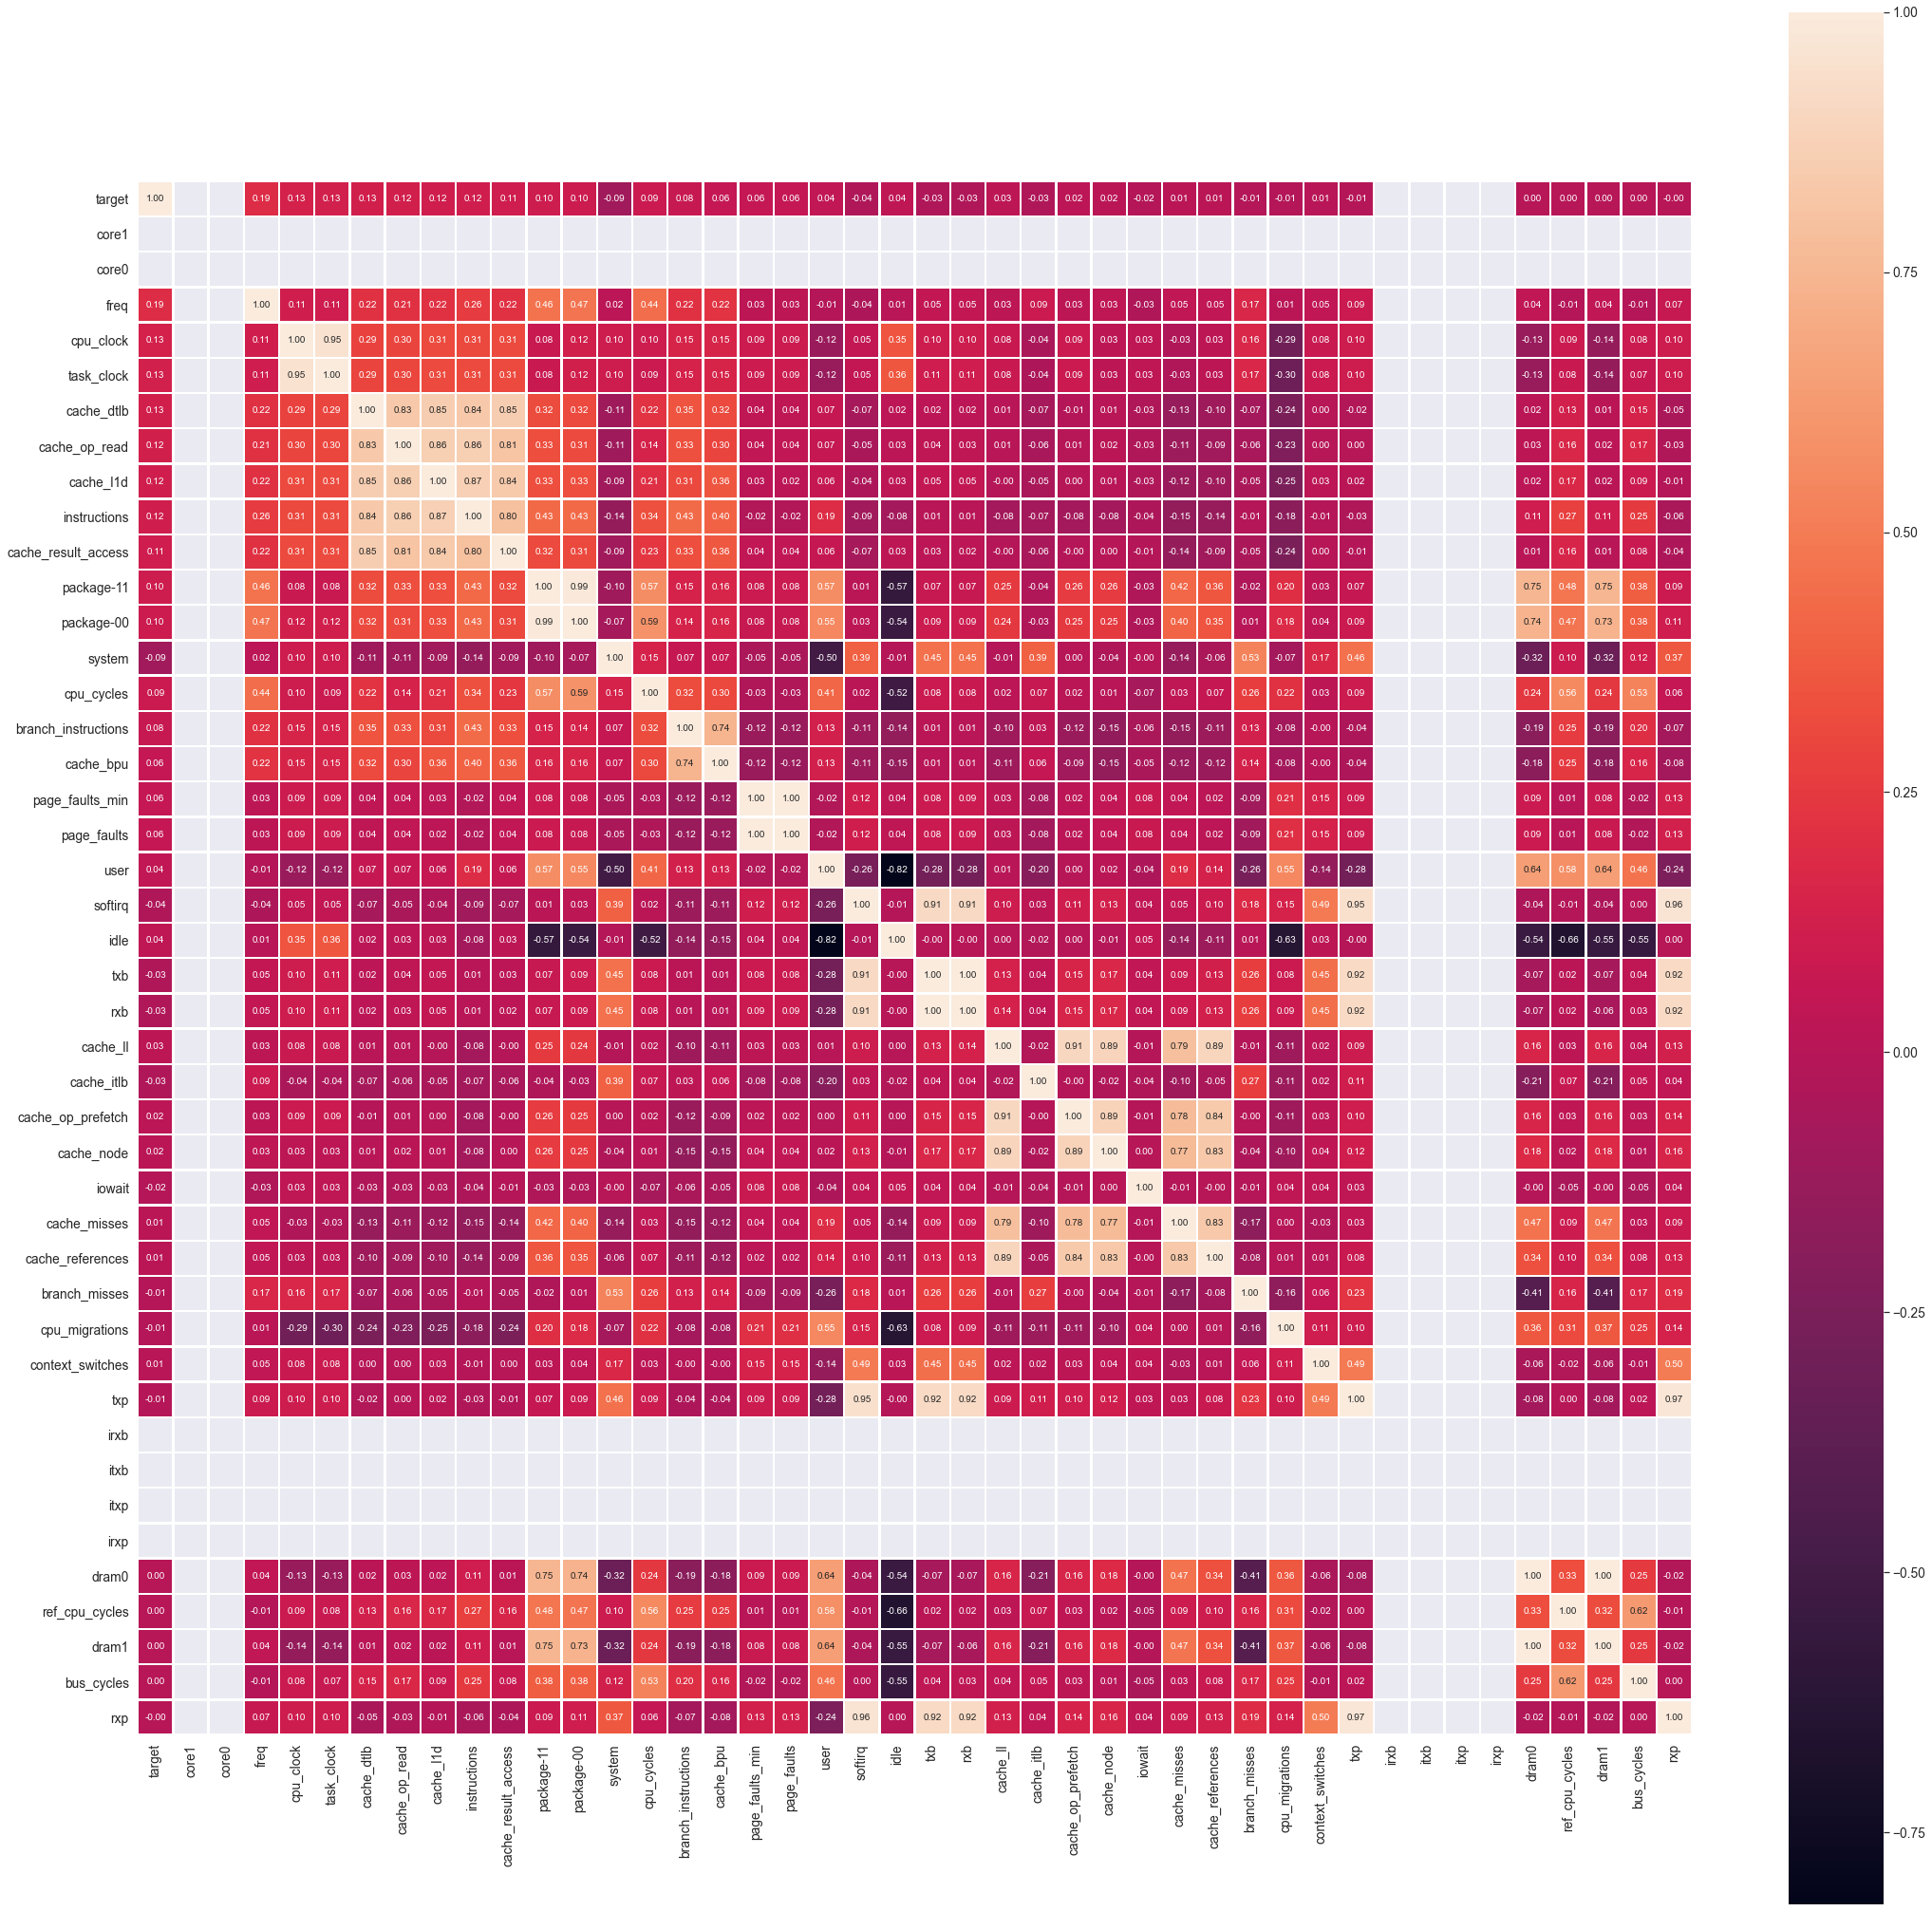

In [61]:
plot_corr_matrix(vectors_target, len(vectors_target.columns), 'target')

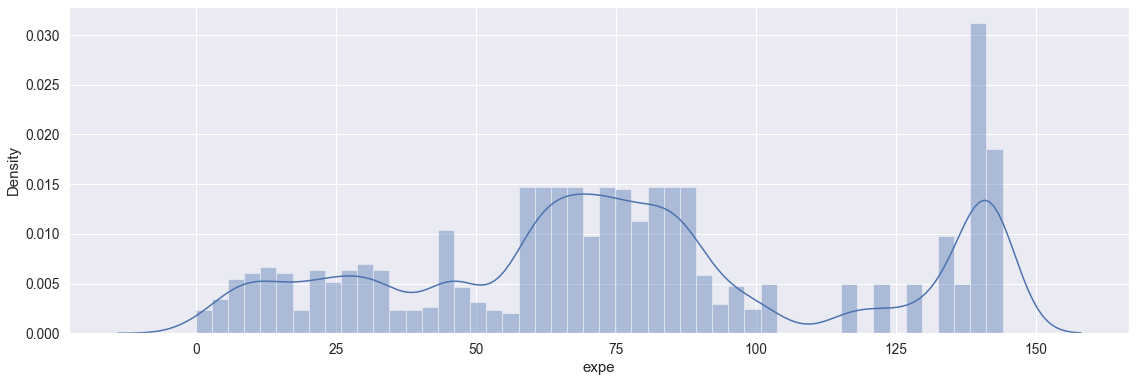

In [72]:
len(set(vectors_target.expe))
fig, ax = plt.subplots(figsize=[19, 6])
sns.distplot(vectors_target.expe, label="duration");

In [73]:
vectors_target.expe.value_counts()

141    3471
143    1170
144     819
140     741
74      663
       ... 
55       39
21       39
1        39
39       39
25       39
Name: expe, Length: 109, dtype: int64

In [74]:
knowledge[knowledge.expe == 141]

,hostname,fullname,nproc,duration,startTime,endTime,fmin,fmax,hostlist,basename,expe,power,energy,etp,metric,target,targetZ
13615,grisou-1.nancy.grid5000.fr,ep-D-64,64,119.360000,1589565901,1589566023,1200000,1200000,grisou-1.nancy.grid5000.fr;grisou-2.nancy.grid...,0_allpct_grisou-1.nancy.grid5000.fr_1589565839,141,137.259615,16383.307692,1.955512e+06,energy,1600000,1600000
13616,grisou-1.nancy.grid5000.fr,ep-D-64,64,110.210000,1589566035,1589566147,1200000,1300000,grisou-1.nancy.grid5000.fr;grisou-2.nancy.grid...,0_allpct_grisou-1.nancy.grid5000.fr_1589565839,141,140.255319,15457.538723,1.703575e+06,energy,1300000,0
13617,grisou-1.nancy.grid5000.fr,ep-D-64,64,102.160000,1589566160,1589566264,1200000,1400000,grisou-1.nancy.grid5000.fr;grisou-2.nancy.grid...,0_allpct_grisou-1.nancy.grid5000.fr_1589565839,141,143.955056,14706.448539,1.502411e+06,energy,1400000,0
13618,grisou-1.nancy.grid5000.fr,ep-D-64,64,96.060000,1589566276,1589566374,1200000,1500000,grisou-1.nancy.grid5000.fr;grisou-2.nancy.grid...,0_allpct_grisou-1.nancy.grid5000.fr_1589565839,141,146.732558,14095.129535,1.353978e+06,energy,1500000,0
13619,grisou-1.nancy.grid5000.fr,ep-D-64,64,89.730000,1589566387,1589566478,1200000,1600000,grisou-1.nancy.grid5000.fr;grisou-2.nancy.grid...,0_allpct_grisou-1.nancy.grid5000.fr_1589565839,141,149.038462,13373.221154,1.199979e+06,energy,1600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45975,grisou-1.nancy.grid5000.fr,mpigeneric-0-16-0-0,64,36.052643,1589649853,1589649891,1200000,2000000,grisou-1.nancy.grid5000.fr;grisou-2.nancy.grid...,0_allpct_grisou-1.nancy.grid5000.fr_1589565839,141,237.724138,8570.583477,3.089922e+05,etp,2000000,0
45976,grisou-1.nancy.grid5000.fr,mpigeneric-0-16-0-0,64,34.461414,1589649904,1589649940,1200000,2100000,grisou-1.nancy.grid5000.fr;grisou-2.nancy.grid...,0_allpct_grisou-1.nancy.grid5000.fr_1589565839,141,242.035714,8340.892953,2.874390e+05,etp,2100000,0
45977,grisou-1.nancy.grid5000.fr,mpigeneric-0-16-0-0,64,33.139848,1589649952,1589649987,1200000,2200000,grisou-1.nancy.grid5000.fr;grisou-2.nancy.grid...,0_allpct_grisou-1.nancy.grid5000.fr_1589565839,141,247.230769,8193.190113,2.715211e+05,etp,2200000,0
45978,grisou-1.nancy.grid5000.fr,mpigeneric-0-16-0-0,64,31.996871,1589650000,1589650034,1200000,2300000,grisou-1.nancy.grid5000.fr;grisou-2.nancy.grid...,0_allpct_grisou-1.nancy.grid5000.fr_1589565839,141,252.307692,8073.056683,2.583126e+05,etp,2300000,0


## Data pre-processing

Drop all columns with only small correlation to target, standardscaler, ...

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [19]:
skf = StratifiedKFold(n_splits=5)
vectors_target['Kfold'] = -1
vectors_target['group'] = vectors_target.apply(lambda row: row['metric'] + str(row['expe']), axis = 1)
for i, (train_index, test_index) in enumerate(skf.split(vectors, knowledge.target, groups = vectors_target['group'])):
    print("Fold: ",i, "TEST:", test_index)
    vectors_target.loc[list(test_index),'Kfold'] = i

Fold:  0 TEST: [    0     1     2 ... 16947 16948 16949]
Fold:  1 TEST: [ 5257  5258  5260 ... 23091 23092 23093]
Fold:  2 TEST: [11474 11486 11546 ... 30311 30312 30313]
Fold:  3 TEST: [22363 22376 22402 ... 39918 39931 40009]
Fold:  4 TEST: [36855 36881 36933 ... 47820 47821 47822]


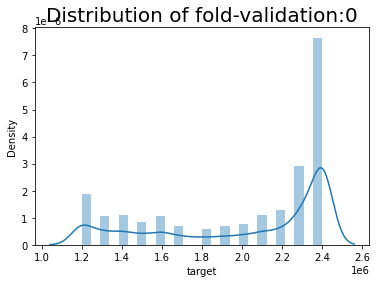

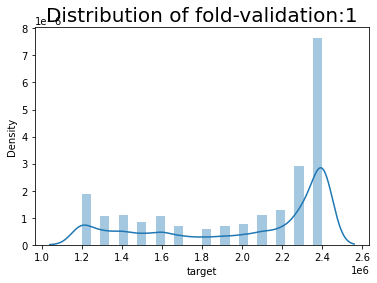

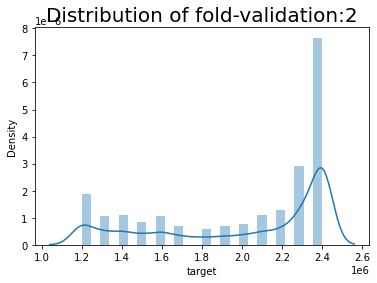

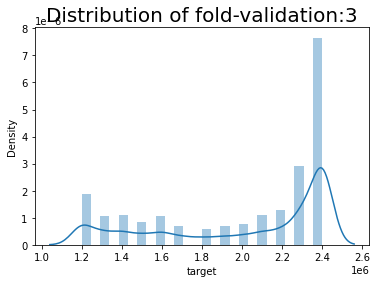

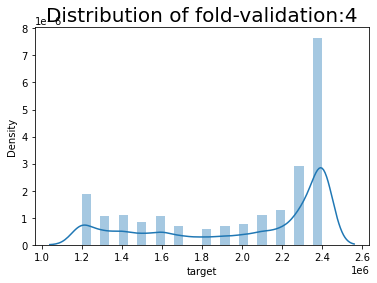

In [20]:
for i in range(5):
    plt.figure()
    sns.distplot(vectors_target[vectors_target.Kfold != i]['target'])
    plt.title("Distribution of fold-validation:"+str(i), fontsize=20)
    plt.show()
    

In [163]:
FOLD = 1
sc = StandardScaler()
df_train = sc.fit_transform(vectors[vectors_target.Kfold != FOLD])
df_test = sc.transform(vectors[vectors_target.Kfold == FOLD])
df_train_sc = pd.DataFrame(df_train,columns = vectors.columns)
df_test_sc = pd.DataFrame(df_train,columns = vectors.columns) 

In [169]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
principalComponents = pca.fit_transform(df_train_sc)
principalDf = pd.DataFrame(data = pca.components_, columns=vectors.columns)

In [170]:
principalDf

,cache_references,dummy,cache_dtlb,ref_cpu_cycles,cache_node,cache_bpu,cache_op_prefetch,task_clock,cache_op_read,bpf_output,...,nice,system,idle,iowait,irq,softirq,steal,guest,guest_nice,freq
0,0.158897,-0.077376,0.189039,0.257769,0.091576,-0.140379,-0.263261,0.253722,0.165192,-0.062706,...,-0.000000e+00,-0.012877,-0.046695,-0.006861,-0.0,-0.025458,-0.0,-0.0,-0.0,-0.031179
1,-0.000101,0.013292,0.194098,0.027530,0.079749,0.090787,-0.040027,0.056066,0.207530,0.057881,...,0.000000e+00,0.246772,0.083776,-0.050045,0.0,0.308278,0.0,0.0,0.0,0.047420
2,-0.111790,-0.081434,-0.011556,-0.080135,-0.055403,-0.197759,0.036497,-0.071264,-0.031182,-0.053898,...,0.000000e+00,0.031070,0.307341,0.204361,0.0,-0.049904,0.0,0.0,0.0,-0.118994
3,-0.070959,-0.269742,0.183437,0.052789,-0.049784,0.294634,-0.067861,0.076863,0.186395,-0.231246,...,-0.000000e+00,-0.219372,0.108051,-0.001585,-0.0,-0.213842,-0.0,-0.0,-0.0,0.103935
4,0.493617,-0.165409,-0.154096,-0.018440,0.486163,0.042348,-0.026276,0.012991,-0.171824,-0.124744,...,-1.576461e-44,-0.024120,0.199811,0.077763,0.0,-0.016768,0.0,0.0,0.0,0.069137
5,0.008489,0.522296,0.060724,-0.073915,0.035040,-0.007529,0.030651,-0.045483,0.061274,0.544166,...,4.017803e-41,-0.184852,0.222089,0.080912,-0.0,-0.108474,-0.0,-0.0,-0.0,0.188920
6,-0.101493,-0.101332,0.024700,-0.084002,-0.141550,0.000170,0.036830,-0.067259,0.021959,-0.150622,...,1.506102e-38,-0.086107,0.237970,0.207951,-0.0,0.041270,-0.0,-0.0,-0.0,0.183472
7,-0.018363,-0.080302,0.038967,-0.059651,0.018904,-0.230416,0.049067,-0.042719,0.053225,-0.165783,...,-2.703637e-37,0.178988,-0.041537,0.031472,0.0,-0.136299,0.0,0.0,0.0,0.692413
8,0.129159,0.048039,0.279530,-0.191229,0.430654,-0.189491,0.200097,-0.189503,0.340295,-0.069579,...,-2.769759e-37,-0.264765,-0.096067,0.112110,0.0,0.050553,0.0,0.0,0.0,-0.174509
9,-0.016807,-0.066892,0.004444,0.040300,-0.056602,0.124813,0.042324,-0.101327,-0.020089,-0.059485,...,-1.655096e-35,0.003772,0.002804,0.711562,0.0,0.069983,0.0,0.0,0.0,0.182736
